# <span style="color:#F4563B"> Prédiction du risque de défaut des clients d'une microfinance à but non lucratif : Cas de Kiva </span>

# <a name="cadregén"></a> <span style="color:#FA8072"> Cadre général de l'étude </span>

*En introduction de ce projet, présentons le contexte scolaire dans lequel il est rédigé à l'ENSAE, le contexte professionnel dans lequel il est étudié du point de vue de l'entreprise concernée, ainsi que la problématique traitée et le plan suivant lequel elle sera présentée.*

## <span style="color:#F5B7B1"> Contexte scolaire </span>

L'***ENSAE*** est l'une des principales Grandes Écoles françaises spécialisée en Économie, Data Science, Sciences Sociales Quantitatives, Finance et Actuariat. Parmi les enseignements fondamentaux de cette École, figurent les compétences informatiques pour lesquelles le cours ***Python pour le data scientist/ économiste*** est administré aux étudiants de deuxième année.

Il s'agit de les initier à la ***manipulation***, la ***visualisation*** et la ***modélisation de données*** en ***Python***, langage aujourd'hui très présent chez les scientifiques. Dans le but de confronter les enseignements reçus à des problématiques réelles, des thématiques et bases de données à analyser sous forme de projets ont été demandées aux étudiants répartis en groupes de deux (02) ou de trois (03).

C'est dans ce cadre que nous avons choisi, avec l'accord des enseignants, de travailler sur du ***credit scoring*** sur une base de la microfinance à but non lucratif ***Kiva*** collectée sur leur [site internet](https://www.kiva.org/build/data-snapshots) le ***20 Octobre 2020***.

## <a name="contexteprof"></a> <span style="color:#F5B7B1"> Contexte professionnel (fonctionnement de Kiva) </span>

***Kiva*** est une organisation internationale à but non lucratif, plateforme de [financement participatif](https://www.economie.gouv.fr/cedef/financement-participatif) fondée en 2005 à San Francisco en solution au problème de non bancarisation touchant encore 1,7 milliards de personnes dans le monde aujourd'hui (Source : [site de Kiva](https://www.kiva.org/about)). Elle met en relation des prêteurs (à capacité de financement) et des projets (à besoin de financement). A ce jour, 1,51 millards de prêts ont été financés par 2 921 prêteurs à travers Kiva (Source : [site de Kiva](https://www.kiva.org/about)).

Deux (02) types de prêteurs se distinguent : d'une part les particuliers, et d'autre part les entreprises, organisations ou fondations partenaires. Aucun d'entre eux ne reçoit d'intérêt, puisqu'aucun intérêt n'est demandé aux emprunteurs. Les prêteurs particuliers n'y gagnent donc rien financièrement, et les partenaires reçoivent parfois de petits frais de service de la part de Kiva. En effet, l'organisation dispose de fonds collectés chaque jour auprès de donateurs, qui leur permettent de rémunérer les 110 employés (à la date du 11/12/2020, source : [site de Kiva](https://www.kiva.org/about)) qui y travaillent, de financer les petits frais de service des partenaires, de prêter directement aux entrepreneurs et de couvrir tous les frais d'opérations liés à leur activité.

Par ailleurs, en situation d'incapacité de remboursement d'un prêt, aucun dédommagement n'est assuré par Kiva. Les fournisseurs doivent simplement considérer le solde impayé comme une perte. Pourtant, les institutions financières telles que nous les connaissons (banques, microfinances, etc...), tirent leurs bénéfices des intérêts que les emprunteurs payent au moment du remboursement. Si un prêt est remboursé après le délai, cela constitue un manque à gagner, et s’il n’est pas remboursé, cela constitue en plus une perte de capital lorsqu’aucune véritable garantie de paiement n’est exigée à l’emprunteur.

Ainsi, en tant que prêteur (intermédiaire des prêteurs), Kiva est nécessairement confrontée à la problématique de non remboursement des prêts. Toutefois, à la différence des banques et microfinances pour lesquelles le remboursement est une question, non seulement de pérennité mais surtout de rentabilité, Kiva s'y interesse pour limiter les pertes des particuliers prêteurs et de ses partenaires, et ainsi encourager les dons et partenariats pour assurer la perrenité de ce service dont l'utilité est évidente.

Consciente de cela, Kiva a mis en place un système de sélection et de suivi et évaluation des projets à financer. Pour être en accord avec cette idée de fournir du financement à ceux qui ne sont pas en mesure de les obtenir auprès des banques, Kiva a mis en place un système de garantie (orienté microfinance) plus adapté aux agents qui ne sont pas en mesure de disposer de garanties telles qu'exigées par les banques (propriétés ou autres capitaux disponibles), sur la base duquel il approuve ou pas le prêt : la **"[souscription sociale](https://www.kiva.org/businesscenter/what-is-social-underwriting)"**.

Il est question pour l'emprunteur de rechercher lui-même, durant une **"période de collecte privée de fonds"**, cinq (05) à ving-cinq (25) prêteurs (particuliers ou organisations) de sa communauté qui se porteront garants de lui en lui prêtant une certaine somme. Les emprunteurs de Kiva peuvent également (facultatif) trouver des administrateurs qui se portent garants de leurs prêts en mettant leur réputation et leur crédibilité en jeu, et/ ou fournir trois (03) références (clients, fournisseurs, petits commerces de sa communauté, etc...).

Le système de sélection consiste alors en un jugement de la réputation d'un emprunteur et de la crédibilité de son projet ; le premier se déduisant simplement de la réputation de ses références, administrateurs ou garants, et le second relevant de l'étude de la faisabilité et de la rentabilité du projet pour lequel le financement est demandé. Après financement, le projet est suivi et évalué par les experts de Kiva pour s'assurer de leur bonne gestion. Et, si l'emprunteur se retrouve tout de même dans la difficulté de rembourser son prêt, le partenaire ou Kiva (le prêteur) rééchelonne le prêt afin de lui faciliter le remboursement.

## <span style="color:#F5B7B1"> Problématique et objectifs du travail </span>

Dans le même sillage que le processus de sélection assez subjectif présenté, ce travail se propose de répondre d'une façon plus objective à la question : à qui prêter ? Cette problématique relève du credit scoring et cette étude est conduite, bien qu'en premier lieu dans une optique de mise en pratique de la programmation en language Python, également dans le but d’élaborer un modèle statistique qui puisse permettre de séparer les emprunteurs (projets) potentiels de Kiva entre ceux pour qui des fonds pourraient être collectés et ceux à qui on refuse le financement.

Concernant l'aspect "programmation", les techniques suivantes (liste non exhaustive) seront appliquées :
* importation dynamique et statistique de la base de données ;
* webscrapping ;
* représentation spaciale ;
* natural language processing (NLP) ;
* etc...

Par alleurs, quant à la modélisation, il sera spécifiquement question :
* d’analyser les caractéristiques individuelles des emprunteurs (projets) liées à l'échec ;
* de dégager le profil des projets qui sont remboursés et le profil de ceux qui ne le sont pas ;
* de construire un modèle qui rend compte, sous la forme d’un score, du niveau de risque que représente chaque projet ;
* de proposer une échelle de notation des projets suivant leurs scores ;
* de proposer une stratégie permettant d’évaluer les projets à l'aide du modèle construit.

## <span style="color:#F5B7B1"> Hypothèse </span>

Le travail qui sera effectué repose sur l’hypothèse principale qu’il existe une différence dans les caractéristiques des projets qui sont remboursés et de ceux qui ne le sont pas.

## <span style="color:#F5B7B1"> Plan du travail </span>

<span style="color:#FA8072"> Section I) Cadre théorique de l'étude </span>

<span style="color:#F5B7B1"> I) Généralités sur la microfinance à but non lucratif et le credit scoring </span>

<span style="color:#F5B7B1"> II) Revue de littérature et méthodologie de l'étude </span>

<span style="color:#FA8072"> Section II) Cadre pratique de l'étude </span>

<span style="color:#F5B7B1"> I) Preprocessing et visualisation </span>

<span style="color:#F5B7B1"> II) Modélisation </span>

# <span style="color:#FA8072"> Cadre théorique de l'étude </span>

*Avant de se lancer dans les analyses proprement dites, il convient de présenter le concept de microfinance à but non lucratif qui pourrait être nouveau pour beaucoup, d'expliquer succintement le processus d'emprunt chez Kiva, de récapituler quelques travaux sur le credit scoring ayant inspiré la méthodologie que nous avons adopté et de dérouler cette méthodologie.*





## <span style="color:#F5B7B1"> Généralités sur la microfinance à but non lucratif et le credit scoring </span>

*Nous débutons cette section par la présentation du concept de microfinance à but non lucratif.*

### <span style="color:#FED2CA"> La microfinance à but non lucratif </span>

*Tout d'abord, la microfinance, qu'est-ce que c'est ?*

#### La microfinance

La microfinance se définit comme un ensemble de services financiers (crédit, assurance, épargne) destinés aux pauvres exclus du système bancaire traditionnel pour leur permettre de financer une activité génératrice de revenu, pour leur inclusion financière. L'on assimile très souvent la microfinance à son produit le plus populaire, le ***microcrédit***. Etant donné que notre projet ne concerne que ce dernier produit, nous vous proposons de nous arrêter quelques instants sur ce concept.

##### Etymologie du microcrédit

À ce jour, il n’existe pas de définition universelle du microcrédit. Cependant, l’idée de base retrouvée dans toutes les définitions est contenue dans l’étymologie de ce mot. Pour comprendre le concept de microcrédit, il est alors sagace de revenir à sa genèse et à son histoire.

Le mot *« microcrédit »* est composé à partir de l’adjectif grec *« mikros »*, généralement traduit en *« petit »* ou *« un peu »*, qui qualifie tout ce qui est de faible dimension ; et du verbe latin *« credere »* qui se traduit en *« faire confiance à »*, *« faire confiance pour »* et également *« confier en prêt »*. Au sens brut, un microcrédit renvoie donc simplement à un prêt de faible dimension, la dimension étant ici le montant. Mais la conception du microcrédit ne se limite pas à cette idée, et provient du contexte dans lequel cette notion est née.

##### Origine du microcrédit

Bien que des antécédents puissent être retracés dans plusieurs endroits dans le monde, le microcrédit doit sa popularité à l’initiative du ***Dr Muhammad Yunus*** au début des années 70. Avec ses étudiants de l’université de Chittagong au Bangladesh, le professeur d’économie constate que de nombreux marchands et artisans ont besoin de petites sommes d’argent pour développer leurs activités mais ne peuvent pas les obtenir auprès des banques car, pauvres, ils ne possèdent pas de garantie et les montants sollicités sont trop faibles pour générer les bénéfices souhaités.

Il s’engage alors à prêter de l’argent à ces artisans sous des conditions plus raisonnables : un prêt n’est accordé qu’à un groupe d’artisans qui pourront développer leurs activités séparément mais qui devront le rembourser ensemble. En d’autres termes, chacun des artisans est garant des autres.

Ainsi, il conçoit un nouveau système de garantie en marge de celui pratiqué par les banques, basé sur la confiance et la solidarité. Satisfait de l’utilité procurée par le premier prêt, Muhammad Yunus crée en 1976 au Bangladesh la Grameen Bank, première institution spécialisée dans le microcrédit et première tentative de solution entrepreneuriale formelle moderne à l’exclusion bancaire des plus pauvres.

Il doit à cette initiative le surnom « banquier des pauvres » et le prix Nobel de la paix reçu en 2006. Avec le succès de ce nouveau système de prêts perceptible à l’évolution des activités locales qui témoigne de son utilité et à son taux de remboursement de l’ordre de 97% pour des taux d’intérêts élevés qui démontre sa rentabilité, ce modèle ne tarda pas à être copié un peu partout dans le monde, pour aider les plus pauvres à démarrer des activités génératrices de revenus.

##### Définition du microcrédit

C’est ainsi que le microcrédit s’associe, non seulement à un prêt de faible montant, mais également à un prêt destiné aux pauvres ne disposant ni d’apport personnel suffisant, ni de la garantie exigée par les banques traditionnelles. Sans garantie et les montants demandés étant trop faibles donc jugés peu rentables, ces banques ne sont pas intéressées à accorder de tels prêts.

#### La microfinance à but non lucratif

Le microcrédit correspond alors au financement offert aux populations exclues du système bancaire classique ([Ellé, 2017](https://doi.org/10.1016/j.rgo.2017.09.004)). En général, les microcrédits offrent aux pauvres la possibilité d’emprunter de l’argent contre un accord pour rembourser ces fonds avec intérêts et/ou frais à une/plusieurs date(s) future(s) fixée(s). Mais ce modèle, qualifié de ***microfinance à but lucratif***, bien qu'étant le plus répandu, n'est pas le seul appliqué. Kiva, Babyloan, des organisations ***à but non lucratif*** proposent à ces personnes des prêts ***sans intérêt*** et ***sans frais***. Leur activité est qualifiée de ***microfinance à but non lucratif***.

*Nous rebondissons directement sur l'activité de Kiva dont le fonctionnement général a été présenté dans le [contexte professionnel](#contexteprof) de ce projet. Il ne reste qu'à dérouler le processus d'emprunt.*

#### Processus d'emprunt chez Kiva

Les étapes d'un prêt chez Kiva sont les suivantes :

* **La demande de prêt** : L'emprunteur adresse une demande de prêt soit directement à Kiva, soit à un partenaire.
* **L'étude de la demande de prêt** : Si la demande est directement adressée à Kiva, c'est le système de [souscription sociale](#contexteprof) qui permet à l'organisation de décider si elle approuve le prêt ou pas. Autrement dit, Kiva approuve ou désapprouve le prêt selon la réputation et la crédibilité des références de l'emprunteur. Si la demande est plutôt adressée à un partenaire, celui-ci se charge d'approuver ou de refuser avec l'aide d'institutions de crédit ou d'autres organisations à but non lucratif. Kiva procède toutefois au suivi du prêt pour le partenaire.
* **La collecte privée de fonds** : Comme expliqué dans le principe de [souscription sociale](#contexteprof), l'emprunteur dispose d'une certaine période pour obtenir du financement auprès de prêteurs de son entourage.
* **La collecte publique de fonds** : Le prêt est posté sur le site de Kiva. L'emprunteur doit activement faire campagne pour recueillir le plus de fonds possible et un financement entier dans un délai de trente (30) jours pour pouvoir recevoir l'argent. Les prêteurs peuvent contribuer à partir de 25 dollars.
* **Le remboursement** : Les prêteurs sont remboursés au fur et à mesure, suivant le calendrier initialement fixé. Ils sont directement remboursés sur leurs comptes Kiva et peuvent retirer, faire des dons ou financer d'autres prêts avec ces fonds.

*Ayant terminé avec la présentation de Kiva et de la microfinance à but non lucratif, nous poursuivons avec le second concept clé de ce travail : le ***credit scoring***.*

### <span style="color:#FED2CA"> Présentation du credit scoring </span>

*Dans les établissements de crédit, le recours au credit scoring est une pratique très populaire permettant d’évaluer, de mesurer, de quantifier le risque de crédit. Ainsi, avant de passer au credit scoring proprement dit, la notion de risque de crédit sera abordée.*

#### Le risque de crédit

##### Définition

Lorsqu’un agent (individu, ménage, entreprise, établissement de crédit) octroie un prêt à un autre agent, il existe toujours pour le prêteur un risque appelé risque de crédit. C'est un concept très important et très courant dans les établissements financiers, pour lequel de nombreux auteurs ont proposé des définitions pouvant être synthétisées comme suit :

Le *risque de crédit* est le risque de non-remboursement de ses dettes par un emprunteur défaillant. Il s’assimile au degré d’incertitude qui pèse sur l’aptitude d’un emprunteur à rembourser sa dette, c’est-à-dire à l’incertitude des pertes pouvant être générées par un crédit donné.

##### Composantes

Le risque de crédit se décompose en trois éléments :

- le **risque de défaut** qui est la probabilité d’un manquement ou d’un retard de l’emprunteur sur le paiement de sa dette (aux échéances fixées) ;
- le **risque de recouvrement en cas de défaut** ou risque lié à l’incertitude du recouvrement une fois le défaut survenu ;
- et le **risque de dégradation de la qualité de crédit** qui est le risque que la qualité perçue de l’emprunteur se dégrade pendant la durée du crédit.

*Dans le cadre de ce projet, nous nous intéressons uniquement au risque de défaut des emprunteurs de Kiva.*

##### Risque de défaut

La ***défaillance*** c’est la situation dans laquelle l’emprunteur n’est plus en mesure d’honorer ses engagements financiers. Dans la pratique, chaque prêteur a la latitude de définir le défaut, c’est-à-dire les conditions dans laquelle un emprunteur est considéré comme défaillant.

En Italie par exemple, l’association des banques indique que le défaut peut correspondre à un arriéré de 180 jours tandis qu’en Espagne, un arriéré de 90 jours semble acceptable (Gouriéroux & Tiomo, 2007). La situation de défaillance (défaut) est donc définie par chaque pays et par chaque établissement de crédit selon ses spécificités.

*Après ce petit tour de la notion de risque de crédit appréhendé par le credit scoring, nous passons à la présentation du credit scoring proprement dit.*

#### Le credit scoring

##### Définition

Le credit scoring est une méthode très utilisée dans les établissements de crédit, intégrée dans la décision d’octroi ou de rejet de crédit. Plusieurs auteurs ont tenté de définir ce concept. Quelques unes des définitions les plus partagées dans la littérature sont ci-après citées.

- « Le credit scoring est une méthode d’évaluation du risque de crédit des demandes de prêt. À partir de données historiques et de techniques statistiques, le credit scoring tente d’isoler les effets de plusieurs caractéristiques des emprunteurs sur le défaut de paiement. La méthode produit un « score » qu’une banque peut utiliser pour classer ses potentiels emprunteurs en termes de risque. » ([Mester, 1997](https://www.researchgate.net/profile/Loretta_Mester/publication/5051659_What_Is_the_Point_of_Credit_Scoring/links/54b668cf0cf2bd04be32098a.pdf))
- « Le credit scoring est le recours aux modèles statistiques en vue de transformer des données pertinentes en des indicateurs numériques mesurables à des fins d’aide à la décision d’octroi ou de refus de crédit. » ([Anderson, 2007](https://global.oup.com/academic/product/the-credit-scoring-toolkit-9780199226405?cc=us&lang=en&#))

De ces différentes définitions, il ressort que le credit scoring prend en entrée un historique d’un ensemble de caractéristiques liées à des prêts antérieurement contractés, construit à l’aide de techniques statistiques un modèle qui prédit, sous la forme d’une note (ou « score »), la probabilité qu’un potentiel emprunteur ne rembourse pas son prêt comme prévu (défaut) et qui guide le prêteur pour décider s’il lui octroie ou pas un crédit.

*Pour résoudre les problématiques de credit scoring, la littérature nous oriente vers un schéma assez précis ci-après déroulé.*

##### <a name="schemares"></a> Schéma de résolution d’une problématique de credit scoring

Disposant de l’historique de caractéristiques liées à des prêts antérieurement contractés nécessaire, la construction de modèles de credit scoring implique généralement le processus suivant, présenté par [N. Chen et al. (2016)](https://doi.org/10.1007/s10462-015-9434-x) :

* **Définition du défaut de remboursement** : elle s’assimile à la définition de la variable cible, une variable qualitative à deux classes indiquant si un emprunteur/ projet est « bon » ou « mauvais », c’est-à-dire s’il est digne de confiance/ prometteur ou pas. Cette qualité d’être « bon » ou « mauvais » est exprimée en fonction du défaut de remboursement. Par exemple, un-emprunteur peut être jugé mauvais s’il enregistre au moins un défaut de remboursement sur une période donnée. Préciser le sens considéré du défaut de remboursement est donc primordial.
* **Pré-traitement des données** : il s’agit du traitement des valeurs manquantes, de la normalisation, du filtrage, etc. . . appliqués aux données constituant l’historique de caractéristiques liées aux prêts.
* **Sélection des variables et réduction de la dimensionnalité** : cela consiste au filtrage des caractéristiques (variables) et emprunteurs (individus) non pertinents. Les outils de sélection des variables (Analyse en Composantes Principales ou ACP, Analyse des Correspondances Multiples ou ACM, analyse discriminante, etc. . . ) servent à la réduction de la dimensionnalité de l’ensemble de données.
* **Implémentation des modèles** : différents algorithmes sont implémentés à partir des données issues de la phase précédente pour prédire la variable cible à deux modalités.
* **Évaluation du modèle** : La performance des prédictions est évaluée sur un ensemble test pour comparer les différents algorithmes implémentés.

In fine, on obtient un modèle prédisant la probabilité de défaut de remboursement d’un potentiel emprunteur à partir de ses caractéristiques, probabilité qui pourra être convertie sous forme de score puis associée à une échelle de risque qui, elle-même, ne pourra qu’orienter le décideur (ici Kiva) dans sa décision d’octroi ou de rejet de crédit puisque ce dernier devra décider à partir de quel seuil les demandes seront rejetées, acceptées ou encore mieux étudiées.

*Le credit scoring a à son compte de nombreux avantages, et présente également de nombreuses limites.*

##### Quelques avantages et limites du credit scoring

Parmi les avantages du credit scoring, on cite :

* l’amélioration de l’efficience dans le processus d’analyse et de livraison du crédit (Kulkosky, 1996) : le calcul du score de crédit est rapide, ce qui non seulement permet une prise de décision également rapide, mais autorise l’automatisation du processus d’octroi de crédits ;
* la réduction de la discrimination entre les clients : le credit scoring fournit une évaluation objective de la solvabilité des emprunteurs ; deux clients ayant les mêmes caractéristiques sont traités de la même façon par le modèle de credit scoring contrairement à l’évaluation subjective d’agents dans laquelle les affinités et sentiments sont prises en compte ;
* la souplesse de la méthode, permettant de modifier la politique de crédit simplement en jouant sur le seuil de sélection des dossiers.

Entre autres limites du credit scoring, on peut citer :

* l’hypothèse fondamentale de toute modélisation prédictive est que le passé peut prédire l’avenir ([Berry & Linoff, 2000](https://doi.org/10.1108/imds.2000.100.5.245.2)), pourtant l’avenir peut être différent du passé : les prédictions de défaut du credit scoring s’appuient uniquement sur les comportements passés et parfois, ceux-ci changent rapidement au cours du temps nécessitant une mise à jour constante des modèles ;
* l’omission de variables importantes ([Avery et al., 2000](https://www.federalreserve.gov/pubs/bulletin/1996/796lead.pdf)) : le défaut de crédit peut également s’expliquer par des variables qui ne sont pas prises en compte dans le modèle ;
* le modèle peut être construit en utilisant un échantillon biaisé de clients à qui des crédits ont été accordés ([Hand, 2001](https://doi.org/10.1093/imaman/12.2.139)) : ceci s’explique principalement par le fait que les clients à qui des crédits ont été refusés ne soient pas inclus dans l’échantillon de base du modèle puisqu’il n’est pas possible de se prononcer sur leur défaillance ; une attention particulière doit ainsi être prêtée pour limiter au mieux le biais causé par l’écart entre le profil des clients composant l’échantillon d’origine et celui de l’ensemble des clients.

*Tout au long de ce travail, des techniques de data mining seront utilisées. Nous choisissons de justifier cela en présentant l'utilité que peut avoir le data mining dans la résolution d'une problématique de credit scoring.*

##### Credit scoring et data mining

Une définition pratique du data mining est « la découverte de structures intéressantes, inattendues, ou de grande valeur dans un vaste ensemble de données » ([Hand et al., 2001](https://doc.lagout.org/Others/Data%20Mining/Principles%20of%20Data%20Mining%20%5BHand%2C%20Mannila%20%26%20Smyth%202001-08-01%5D.pdf)). Ces dernières années, les techniques de data mining ont été de plus en plus utilisées pour construire des modèles de credit scoring ([Peng & Chwee, 2004](https://go.gale.com/ps/anonymous?id=GALE%7CA119370565&sid=googleScholar&v=2.1&it=r&linkaccess=abs&issn=01295977&p=AONE&sw=w)).

En effet, l’élaboration de modèles de credit scoring nécessite l’exploitation de grandes masses de données, matière dans laquelle excelle le data mining. À cet effet, les trois grandes catégories de techniques de data mining sont généralement nécessaires : les techniques de description et de visualisation, les techniques d’association et de segmentation, et les techniques de classification et d’estimation (ou de régression).

* La **description** et la **visualisation** interviennent au commencement du processus, pour identifier les structures très souvent complexes dissimulées dans ces énormes masses de données. Les techniques de description et de visualisation (Analyse en Composantes Principales ou ACP, l’Analyse des Correspondances Multiples ou ACM, l’Analyse Factorielle Discriminante ou AFD) permettent ainsi de comprendre et d’appréhender les ensembles de données du credit scoring.

* Les techniques d’**association** (algorithmes à l’instar de l’algorithme Apriori, l’algorithme OPUS) et de **segmentation** (algorithmes k-moyennes (k-means), espérance-maximisation (expectation-maximization algorithm), ...) servent respectivement à déterminer quelles variables s’associent (on parle d’extraire des règles d’association), et à regrouper les objets similaires en séparant ceux qui ne le sont pas. Elles interviennent pour identifier les liens et associations existants entre les caractéristiques sélectionnées pour la construction des modèles de credit scoring.

* La **classification** se définit comme la prédiction d’une variable cible catégorielle tandis que l’estimation et la **régression** fait référence à la prédiction d’une variable cible quantitative. En credit scoring, il s’agit généralement d’une variable à deux modalités indiquant si un client a fait défaut ou pas. Elle peut être directement prédite à l’aide de techniques de classification telles que les arbres de décision, ou encore sous forme de probabilité que le client prenne une des modalités à l’aide de techniques de régression telles que la régression logistique.

Ainsi, le recours au data mining dans le processus de construction de modèles de credit scoring est une pratique justifiée et appropriée, et également courante dans la littérature.

*Ayant acquis les notions essentielles sur le fonctionnement de Kiva et le credit scoring, nous passons à présent à la présentation de quelques travaux empiriques portant sur la question étudiée et au déroulement de la méthodologie qui sera mise en oeuvre pour la résoudre.*






## <span style="color:#F5B7B1"> Revue de la littérature et méthodologie </span>

### <a name="revue"></a> <span style="color:#FED2CA"> Revue de la littérature </span>

La problématique du défaut de remboursement est une problématique très abordée dans la littérature, beaucoup plus traitée dans les banques mais de plus en plus étudiée dans les microfinances à but non lucratif également. De nombreux articles et ouvrages décrivant chacun une problématique de credit scoring bien précise, les méthodes utilisées pour la modélisation et les résultats obtenus existent, et également ceux étudiant les facteurs explicatifs du défaut de remboursement existent. Pour notre étude, nous nous sommes inspirés de plusieurs d'entre eux, dont un en particulier porte directement sur les données étudiées.

Il s'agit de la thèse intitulée **"[Predicting a successful loan in prosocial lending: the role of partner accreditation and storytelling on Kiva.org](https://www.researchgate.net/publication/326426143)"** rédigée par Martina Pocchiari. Le principal apport de ce document à notre travail concerne l'appréhension du défaut de remboursement, élément clé de notre projet comme présenté dans le [schéma de résolution d'une problématique de credit scoring](#schemares). La définition du défaut de remboursement (donc de la variable cible) retenue sera alors précisée lors de la présentation de la base de données de l'étude.

Désirant que ce projet reste principalement axé sur l'application des techniques de Python, seuls les principaux enseignements tirés des différents travaux parcourus ([M. Godquin (2004) : Microfinance Repayment Performance in Bangladesh: How to Improve the Allocation of Loans by MFIs](https://www.researchgate.net/publication/222651429_Microfinance_Repayment_Performance_in_Bangladesh_How_to_Improve_the_Allocation_of_Loans_by_MFIs), [S. Kumar (2007) : Bank of One: Empirical Analysis of Peer-to-Peer Financial Marketplaces](https://www.semanticscholar.org/paper/Bank-of-One%3A-Empirical-Analysis-of-Peer-to-Peer-Kumar/0c9ef0db8b24aadebc928a806e0af0b44a3d9e91), [J. Ledgerwood (1998) : Microfinance Handbook: An Institutional and Financial Perspective](http://hdl.handle.net/10986/12383), [J. Galak, D. Small, A. T. Stephen (2011) : Microfinance Decision Making: A Field Study of Prosocial Lending](https://doi.org/10.1509/jmkr.48.SPL.S130), etc...) seront déroulés ici. Ainsi, ces travaux nous ont enseigné d'une part, que les possibilités sont très ouvertes en ce qui concerne le choix des variables à inclure dans les modèles de credit scoring et, d'autre part, qu'il n'existe pas de technique de modélisation unanimement meilleure que les autres. Toutefois, les techniques que nous avons recensées parmi celles ayant montré les meilleurs performances sont les arbres de décision, la régression logistique et les forêts aléatoires.


### <span style="color:#FED2CA"> Méthodologie de l'étude </span>

*Cette sous-section traite de la méthodologie choisie pour résoudre la problématique de credit scoring posée par l’étude. Elle expose les différentes étapes qui seront réalisées après l'importation dynamique et statique.*

Pour atteindre l’objectif d’évaluation du niveau de confiance à accorder aux emprunteurs et leurs projets, il sera question de construire un modèle prédisant la probabilité que ces derniers fassent défaut à partir de leurs caractéristiques, de convertir cette probabilité sous forme de score puis d’associer à ces scores une échelle de risque qui orientera Kiva dans le choix des projets à approuver. Ceci nécessitera l’exploitation d’un grand ensemble de données. Ceci étant, pour la réalisation de projets d’analyse de grands volumes de données comme c’est le cas de ce travail, il existe un processus standard très utilisé développé par IBM dans les années soixante : il s’agit de la méthode CRISP-DM (Cross Industry Standard Process for Data Mining). Cette étude sera réalisée suivant cette méthodologie.

La méthode CRISP-DM (Cross Industry Standard Process for Data Mining) consiste en six (06) phases, chaque phase étant constituée de diverses tâches à réaliser. Ces six phases sont : la compréhension du problème métier, la compréhension des données, la préparation des données, la modélisation, l’évaluation et le déploiement (Larose, 2005). Il n’existe pas d’ordre préétabli pour l’exécution des différentes phases. Selon le résultat escompté, la méthode peut être personnalisée en réalisant des phases avant d’autres, en faisant des allers-retours entre des phases ou encore en priorisant des phases par rapport à d’autres. Le schéma retenu pour ce travail est ci-après décrit :

#### La compréhension du problème métier ou de l’entreprise

La première étape du processus CRISP-DM consiste à comprendre la problématique que le data mining vise à résoudre, à comprendre les objectifs de l’entreprise en matière de data mining. Cela nécessite dans un premier temps de recueillir les besoins de l’entreprise, définir l’objectif principal de l’étude et le traduire en des objectifs spécifiques de data mining comme il a été fait dans le [cadre général](#cadregén). La phase de compréhension du problème comprend également le recensement des ressources disponibles dans l’entreprise et la définition de certains critères essentiels que sont la variable d’intérêt, la population cible, la période à étudier. S’agissant d’une problématique de credit scoring, définir la variable d’intérêt revient à définir le défaut de remboursement.

#### La compréhension et la préparation des données

À la suite de la compréhension du métier, viennent la compréhension et la préparation des données. La finalité de ces deux phases est la constitution d’une base de données structurée, apurée et prête pour la modélisation. Bien que le schéma classique du processus CRISP-DM place la compréhension des données avant la préparation des données, ces deux phases sont prises ensemble dans cette étude car des allers-retours entre l’une et l’autre phase seront nécessaires pour la mener à bien. Ceci sera mieux expliqué dans la présentation de ces deux phases ci-après.

* La **phase de compréhension des données**, comme son nom l’indique, a pour but de s’imprégner des données disponibles pour le data mining. Elle inclut les tâches suivantes :
    * la ***collecte des données*** recensées à l’étape précédente ainsi que les informations nécessaires pour les comprendre (sources et significations) ;
    * la ***description des données*** : elle consiste à relever les caractéristiques relatives à la quantité et à la qualité des données ;
    * la ***vérification de la qualité des données*** : cela consiste en l’identification des données manquantes, des incohérences et des erreurs dans les données collectées ;
    * l’***exploration des données*** : elle permet, grâce à diverses techniques d’analyse des données, de se familiariser avec les données de l’étude. Elle sera faite en trois étapes principales :
        * L’***analyse descriptive unidimensionnelle*** : en observant la distribution des variables, l’analyse univariée donne une vue synthétique des caractéristiques des emprunteurs et de leur comportement en matière de défaillance de remboursement. S’agissant des ***variables qualitatives***, les distributions des différentes modalités seront évaluées par des tris à plat et représentées graphiquement à l’aide de diagrammes barplots. Cela permettra d’identifier les variables à modalités trop nombreuses ou les modalités de fréquence faible qu’il faudra regrouper pour éviter l’influence qu’elles sont susceptibles d’avoir sur les résultats de prochaines analyses. Quant aux ***variables quantitatives***, des résumés numériques tels que le minimum, le maximum, la moyenne, la médiane, les quantiles et l’écart-type seront calculés. Aussi, leur distribution sera représentée graphiquement à l’aide des courbes de densité et des boxplots. Cette représentation permettra d’une part de juger de leur asymétrie, en fonction de laquelle des transformations de type Box-Cox (logarithme, racine carrée, etc.) seront appliquées pour approcher une distribution normale (les modèles de data mining gagnent en précision avec la normalité des variables explicatives) ; et d’autre part d’identifier les valeurs extrêmes qui seront traitées car les modèles tels que la régression logistique sont sensibles à de telles valeurs. Soutenant l’idée selon laquelle les valeurs extrêmes ne sont pas nécessairement aberrantes et leur suppression constituerait une perte d’information, la technique retenue pour leur traitement est la winsorisation. Elle consiste à fixer une limite sur des quantiles (en général le premier et le 99ème centiles) et à ramener à ces valeurs celles qui se situent au-delà.
        * L’***analyse descriptive bidimensionnelle*** : à la suite de l’observation individuelle des attributs, il est important d’une part de croiser chaque variable explicative avec la variable cible, et d’autre part de croiser les variables explicatives entre elles, dans le but d’évaluer les liens existants entre celles-ci. En effet, lors de la construction des modèles de credit scoring, il est important que les variables explicatives intégrées soient, d’une part, fortement liées à la variable d’intérêt et, d’autre part, indépendantes les unes des autres pour éviter les problèmes liés au [sur-apprentissage](https://mrmint.fr/overfitting-et-underfitting-quand-vos-algorithmes-de-machine-learning-derapent "Il y’a sur-apprentissage d’un modèle lorsque celui-ci s’adapte presque parfaitement à l’ensemble de données sur lequel il a été construit, mais ne saurait être généralisé à d’autres ensembles. Dans cette situation, le modèle perd son pouvoir de prédiction sur d’autres échantillons.").
* La phase de ***préparation des données*** est la plus fastidieuse du data mining, et nécessite d’autant plus de temps et d’énergie que le jeu de données est volumineux. Elle comprend les tâches suivantes :
    * le ***nettoyage des données*** : il s’agit de la gestion des valeurs manquantes (suppression ou remplacement), incohérences et erreurs identifiées ;
    * la ***construction de nouvelles données*** : en général, il est nécessaire de calculer de nouveaux attributs à partir des attributs bruts collectés par l’entreprise, mais également de transformer certains attributs avant de les intégrer dans les modèles ;
        * la ***sélection des données*** : il s’agit du tri des données pertinentes en vue de la modélisation ;
        * le ***fractionnement de la base de données en sous-ensembles d’apprentissage et de test*** : il est recommandé, lorsque la taille de l’ensemble de données disponible pour l’étude le permet, de séparer l’échantillon mère en deux sous-ensembles que sont l’échantillon d’apprentissage et l’échantillon test. L’échantillon d’apprentissage est celui sur lequel les modèles sont construits, et l’échantillon test permet de vérifier l’efficacité des modèles obtenus en apprentissage et sélectionner le meilleur en évitant le biais d’optimisme qui aurait existé si la vérification était faite sur le même échantillon qui a servi à construire le modèle.
        
Ainsi, il sera question de collecter les données, de relever les caractéristiques liées à la quantité et à l’état de ces données, de vérifier leur qualité, de les nettoyer, de les transformer et de construire de nouveaux attributs si nécessaire, d’effectuer une analyse exploratoire sur les données ainsi apurées puis sélectionner les attributs pertinents pour la modélisation et constituer les échantillons d’apprentissage et de test.


#### La modélisation du risque de défaut

La phase de modélisation est considérée comme le coeur du data mining. C’est à ce niveau que les efforts consentis au cours de la compréhension et la préparation des données commencent à être récompensés. Au cours de cette phase, les problématiques de data mining nécessitent le plus souvent de sélectionner plusieurs techniques de modélisation qui seront implémentées avec différents paramètres car le modèle qui résout le mieux le problème de l’étude n’est pas connu a priori.

* **Algorithmes de modélisation**

Avant de construire les modèles, il faut élaborer la façon dont leurs résultats seront testés. Cela nécessite le choix des critères de qualité d’ajustement des modèles et la définition des données sur lesquelles ces critères seront testés. En ce qui concerne la dernière tâche, il s’agit généralement de l’échantillon de test issu du partitionnement de la base entrepris lors de la préparation des données. En somme, la phase de modélisation comprend le choix des techniques à implémenter, le choix des critères de qualité d’ajustement des modèles, la construction des modèles, l’évaluation des modèles et le choix du meilleur modèle.

Pour résoudre la problématique de notre étude, nous souhaitons construire un modèle de prédiction qui attribue à chaque potentiel emprunteur, à partir de ses caractéristiques, un score interprétable comme la probabilité que ce dernier n’honore pas son engagement pour un prêt. Ce score représente le risque de défaillance de l’emprunteur. Pour construire ce modèle, les études précédemment présentées **(San Pedro et al. (2015), Ruiz et al. (2019), Björkegren Grissen (2019), Ots et al. (2020), Shema (2019))** recommandent trois techniques de modélisation, dont deux sont retenues dans ce travail : la régression logistique et l’arbre de décision. La forêt aléatoire ne sera pas appliquée car la population d’étude a une taille suffisamment grande pour se contenter de l’arbre de décision.

##### Régression logistique binaire
    
La régression logistique est une technique de régression qui permet d’exprimer une variable réponse catégorielle (indiquant la survenue d’un évènement donné) sous forme d’un risque (ou probabilité) en fonction des valeurs prises par un ensemble de variables prédictives ou explicatives
pouvant être quantitatives comme qualitatives. Pour cela, elle est très utilisée pour prédire le risque ou la probabilité qu’un évènement se produise. La variable réponse peut être dichotomique (ou binaire, on parle alors de régression logistique binaire), multinomiale ordonnée (régression logistique ordinale) ou multinomiale non ordonnée (régression logistique multinomiale). Dans le cadre de cette étude, la variable réponse est dichotomique, indiquant si un emprunteur donné a
fait défaut de remboursement ou pas.

En plus du fait d’exprimer des relations non linéaires et de modéliser directement la probabilité de survenue d’un évènement, la régression logistique présente l’avantage de produire des coefficients qui correspondent au logarithme des odds ratio (OR) ou rapports des cotes, indiquant la force et le sens de l’association entre les variables explicatives et la variable d’intérêt et faciles à interpréter. L’odds ratio (OR) de chaque variable (ou modalité pour les variables qualitatives) sera obtenu en calculant l’exponentielle du coefficient correspondant. De plus, cette technique offre la possibilité de prendre en compte les interactions entre les variables explicatives. Cependant, sa sensibilité aux individus hors norme (valeurs extrêmes) et l’exigence de l’indépendance des variables explicatives peuvent limiter son utilisation.

##### Arbre de décision
    
Les arbres de décision constituent l’une des principales techniques utilisées en data mining et également en credit scoring, pour la principale raison qu’en plus d’être performants, ils se prêtent
volontiers à une représentation graphique sous une forme arborescente plus simple à interpréter que des résultats purement numériques. Ils permettent de prédire l’affectation d’individus à des classes d’une variable d’intérêt catégorielle à partir de leurs valeurs sur une ou plusieurs variables prédictives (pouvant être quantitatives comme qualitatives) : on parle d’arbres de classification.

La construction d’un arbre de décision consiste en la définition récursive de noeuds et de sousarbres. La définition d’un noeud consiste à choisir conjointement une variable parmi les variables prédictives et une division qui induit une partition en deux classes (sous-arbres) lorsque la variable d’intérêt a deux modalités. Le choix d’une division consiste lui-même à définir une valeur seuil de la variable sélectionnée si elle est quantitative ou à partager en deux groupes ses modalités si elle est qualitative. Chaque noeud correspond ainsi à un sous-échantillon de l’échantillon mère, le noeud initial (racine) correspondant à l’ensemble de l’échantillon.

Trois points doivent essentiellement être traités pour construire un arbre de décision : la sélection de la meilleure division parmi toutes les divisions admissibles (c’est-à-dire produisant des noeuds tous non vides), la décision qu’un noeud est terminal (un noeud terminal est une feuille) et l’affectation de chaque feuille à une des classes de la variable d’intérêt. Selon le critère de division, la règle d’arrêt et d’affectation, il existe plusieurs algorithmes de construction d’arbres de décision dont les plus populaires sont : CHAID (Chi-Square Automation Interaction Detection), C5.0 (de J.R. Quinlan) et CART (Classification And Regression Tree).

Pour cette étude, l’algorithme CART de Breimer et al. (1984) sera implémenté. Cette méthode se base sur l’indice de Gini comme mesure d’impureté et critère de sélection. Précisément, la meilleure division correspond à celle qui maximise la perte d’impureté. En ce qui concerne le critère d’arrêt, l’algorithme CART a la particularité d’intégrer une procédure entièrement automatique comme règle d’arrêt, contrairement aux autres méthodes faisant intervenir une règle dépendante d’un seuil arbitraire. Le critère d’arrêt consiste à ne pas découper un noeud pur, donc un noeud devient terminal lorsqu’il est jugé sans impureté. Pour éviter un découpage trop fin et une instabilité trop grande, un nombre minimal d’individus est souvent fixé pour chaque division d’un noeud. Toutes les partitions de CART sont binaires.

Parlant de leurs propriétés, les arbres de décision performent bien face à des données hétérogènes, manquantes, des variables liées entre elles et des relations non linéaires entre les variables. Aussi, il est recommandé d’user de cette technique sur de grands échantillons pour que les feuilles ne soient pas de densité trop faible. Ceci dit, l’un des défauts majeurs des arbres de décisions est leur instabilité. En effet, des changements sur les noeuds proches de la racine peuvent complètement modifier l’arbre. En solution à ces défauts et pour améliorer la qualité ou la fiabilité des arbres de décision, des techniques telles que le bootstrap, les forêts aléatoires (encore appelées forêts d’arbres décisionnels) ou encore le boosting ont été conçues.

* **Critères de sélection du modèle optimal**

Cette étude voudrait prédire le mieux possible la classe (« mauvais » ou « bon ») des emprunteurs. Sa capacité à le faire est mesurée par le taux de bon classement (TBC) ou le taux d’erreur (TE), premier critère retenu pour évaluer les modèles. Aussi, nous choisissons de rechercher la meilleure sensibilité possible, dans l'optique de permettre à Kiva de limiter au maximum les défauts et donc n'approuver que les prêts des emprunteurs les plus dignes de confiance, et l’aptitude du modèle à détecter les « bons » emprunteurs est mesurée par la sensibilité. Les modèles seront donc sujets à un arbitrage dans le but de trouver le meilleur compromis entre TBC et sensibilité. Par ailleurs, les performances des modèles en test sont, d’une certaine façon, plus indicatrices de leur qualité que celles en apprentissage puisqu’elles
expriment leur pouvoir de généralisation. Le choix du modèle optimal intégrera donc le pouvoir de généralisation.

Les mesures de qualité d’ajustement des modèles suivantes sont alors choisies pour évaluer les modèles : le taux de bon classement (TBC) ou le taux d’erreur (TE), et la sensibilité obtenus à partir de la matrice de confusion, l’aire sous la courbe ROC et la courbe de lift. À ces indicateurs, s’ajoute la facilité d’interprétation qui sera déterminante dans le choix du modèle final.


#### L’évaluation

La précédente évaluation des modèles concernait leur performance statistique, pour vérifier qu’ils sont performants et efficaces en fonction des critères de data mining choisis. Arrivés à ce stade, la plus grande partie de l’étude de data mining a été réalisée. La présente phase est un approfondissement de l’évaluation. Elle consiste à évaluer l’adéquation du modèle aux objectifs de l’entreprise fixés en amont et à vérifier s’il y’a des raisons professionnelles qui rendent le modèle défaillant. À ce niveau, l’on décide s’il faut passer à la phase de déploiement.

#### Le déploiement

La phase de déploiement correspond à l’opérationnalisation du modèle construit. Elle représente l’aboutissement de toute étude de data mining car sans elle, tous les efforts consentis depuis le début de l’étude sont vains. De façon pratique, le déploiement consiste à utiliser les connaissances obtenues à l’aide du data mining pour apporter des améliorations au sein de l’entreprise. Au cours de cette phase, une présentation simple des résultats de l’étude sera faite pour permettre à Kiva de se les approprier.

*Ayant ainsi déroulé les différentes étapes du travail entrepris, l’on amorce leur réalisation par l'importation dynamique et statique de la base de données.*

# <span style="color:#F4563B"> Preprocessing et visualisation </span>

In [12]:
# pip install missingno
#!pip install squarify
#!pip install bs4
#!pip install pip install WordCloud
#!pip install plotly
#!pip install pycountry_convert
#!pip install langdetect
#!pip install nltk
#!apt-get install libproj-dev proj-data proj-bin
#!apt-get install libgeos-dev
#!pip install cython
#!pip install cartopy

#Package manipulation bases de données
import pandas as pd
import numpy as np

#Importation database from drive
from google.colab import drive
drive.mount('/content/drive')

#Package visualisation
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
# conda install -c conda-forge cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature, COLORS
import math

#Package de traitement des variables
import missingno as msno

#Package pour le scrapping
import urllib
from bs4 import BeautifulSoup
import requests
from urllib import request
import html5lib
import zipfile

#Package analyse textuelle
from wordcloud import WordCloud
from langdetect import detect
import nltk
nltk.download('punkt')

#Package reconnaissance des pays
import pycountry_convert as pc

# Package de modelisation
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from yellowbrick.classifier import ROCAUC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import accuracy_score

Mounted at /content/drive


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.




Dans l'optique de rendre notre travail dynamique, nous avons procédé de deux différentes façons à savoir :

**1 - Télécharger les données de la source à notre ordinateur :** Cette étape présente un inconvénient majeur en terme de temps d'éxécution. Son principal avantage est de rendre automatique l'opération de téléchargement et de dezippage de la base de données. En outre, elle permet de rendre le travail dynamique dans la mesure où elle permettra à n'importe quel utilisateur d'avoir la version la plus récente de la base de données disponible sur le site de Kiva. Son procédé est le suivant :
* scrapper la page web contenant le lien de téléchargement de la base donnée ;
* par la suite, étant donné que la base est dans un format zip, nous recourrons aux outils de python pour la dézipper.

**2 - Utiliser la base de données de kiva du 20/10/2020** disponible en dépôt partagé sur drive. Cette méthode est reputée être très rapide et c'est elle qui sera utilisée dans le cadre de ce projet.

In [ ]:
def importation():
    '''Cette fonction, grâce à des techniques de webscrapping et zipfile, permet de télécharger la base directement
        sur le site de la structure Kiva'''
    
    source = requests.get('https://www.kiva.org/build/data-snapshots').text #Récupération de l'adresse
    soup = BeautifulSoup(source, 'lxml')
    #print(source)
    page = soup.find('div', class_ = 'row page-content') #Scrapping de la page pour rechercher l'élément row page-content dans le div
    #print(json_link.prettify())
    link = []
    
    for i in page.find_all('a'):
        ''' Permet de parcourir l'ensemble des éléments '''
        link.append(i['href'])
    link[1]
    #A ce niveau, nous avons le lien de notre base de données qui est zippée
    
    csv_link = requests.get(link[1])
    
    with open('data.zip','wb') as f:
        f.write(csv_link.content)
    #Extraction
    loan = zipfile.ZipFile('data.zip')
    loan.extractall('data_loan')
    loan.close()
    
    return('data_loan/loans.csv')

# Après exécution de cette fonction, notre base de données data_new est en dépôt local et nous pouvons directement l'utiliser avec pd.read_csv

In [ ]:
# Exécution de la fonction
#loan = pd.read_csv('data_loan/loans.csv')

In [13]:
#Alternative avec googlecolab
loan = pd.read_csv('/content/drive/My Drive/Projet_Python/loans.csv')

In [ ]:
loan.shape

Notre base de données est constituée de `1 968 819 observations` et `34 variables`. Par la suite, nous procédons à la description des différentes variables de la base.

 **Description des variables de la base de données**
 
* 1 - Loan ID : Identifiant de la transaction
* 2 - LOAN_NAME : Nom du prêt
* 3 - ORIGINAL_LANGUAGE : Langue parlée
* 4 - DESCRIPTION : Description de l'emprunteur
* 5 - DESCRIPTION_TRANSLATED : Description textuelle du projet en anglais, espagnol, français ou russe
* 6 - FUNDED_AMOUNT : Montant du prêt acheté par les prêteurs Kiva
* 7 - LOAN_AMOUNT : Montant du prêt qui a été remboursé
* 8 - STATUS : Statut du prêt
* 9 - IMAGE_ID : Image de l'emprunteur
* 10 - VIDEO_ID : Vidéo dans les proﬁls de prêt et les écritures de journal
* 11 - ACTIVITY_NAME : Activité qui sera réalisée avec le montant financé
* 12 - SECTOR_NAME : Secteur industriel auquel appartient l'activité
* 13 - LOAN_USE : Brève description textuelle de l'utilisation qui sera faite du capital financé
* 14 - COUNTRY_CODE : Code à 2 lettres du pays d'origine de l'emprunteur
* 15 - COUNTRY_NAME : Nom du pays de l'emprunteur
* 16 - TOWN_NAME : Nom de la ville de l'emprunteur
* 17 - CURRENCY_POLICY : Politique de change
* 18 - CURRENCY_EXCHANGE_COVERAGE_RATE : Taux de couverture de change
* 19 - CURRENCY : Monnaie
* 20 - PARTNER_ID : ID du partenaire de terrain
* 21 - POSTED_TIME : Date à laquelle le prêt a été comptabilisé
* 22 - PLANNED_EXPIRATION_TIME : Heure à laquelle le prêt est prévu d'expirer
* 23 - DISBURSE_TIME : Heure à laquelle les fonds du prêt ont été remis aux emprunteurs
* 24 - RAISED_TIME : Temps d'échéance augmenté 
* 25 - LENDER_TERM : Durée fixée pour le prêteur
* 26 - NUM_LENDERS_TOTAL : Nombre total de prêteurs
* 27 - NUM_JOURNAL_ENTRIES : Nombre total d'écritures de journal pour le prêt
* 28 - NUM_BULK_ENTRIES : Nombre total d'entrées automatisées ou « groupées »
* 29 - TAGS : Commentaires de l'opération
* 30 - BORROWER_NAMES : Nom de l'emprunteur
* 31 - BORROWER_GENDERS : Genre de l'emprunteur
* 32 - BORROWER_PICTURED : L'emprunteur a-t-il fourni ou non une photo ?
* 33 - REPAYMENT_INTERVAL : Durée fixée pour le remboursement du prêt
* 34 - DISTRIBUTION_MODEL : Prêt obtenu directement auprès de Kiva ou chez un partenaire ?

In [14]:
loan.head()

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,COUNTRY_NAME,TOWN_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,CURRENCY,PARTNER_ID,POSTED_TIME,PLANNED_EXPIRATION_TIME,DISBURSE_TIME,RAISED_TIME,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,1827392,Nelie,English,Nelie is married and works hard to support her...,Nelie is married and works hard to support her...,525.0,525.0,funded,3241689.0,NaN,Charcoal Sales,Retail,to buy more sacks of charcoal to sell.,PH,Philippines,"Siquijor, Negros Oriental",standard,NaN,PHP,145.0,2019-09-02 06:38:09.000 +0000,2019-10-02 11:50:06.000 +0000,2019-08-30 07:00:00.000 +0000,2019-09-04 05:23:12.000 +0000,8.0,15,2,1,#Woman-Owned Business,Nelie,female,true,monthly,field_partner
1,339740,Zoila Rosa,Spanish,La Señora Zoila es socia del banco comunal El ...,Zoila is a member of 'El Cisne' (The Swan) com...,675.0,675.0,funded,878599.0,NaN,Pigs,Agriculture,to buy pigs and pig feed,EC,Ecuador,Cuenca,standard,NaN,USD,137.0,2011-09-22 21:58:02.000 +0000,NaN,2011-09-06 07:00:00.000 +0000,2011-09-26 23:45:51.000 +0000,8.0,23,2,1,NaN,Zoila Rosa,female,true,monthly,field_partner
2,1782205,Rosalinda,English,"Rosalinda is a married woman, who is 41 years ...","Rosalinda is a married woman, who is 41 years ...",400.0,400.0,funded,3180067.0,NaN,Food Production/Sales,Food,"to buy ingredients such as sugar, coconut milk...",PH,Philippines,"Ibajay, Aklan",shared,0.1,PHP,145.0,2019-06-18 03:39:20.000 +0000,2019-07-20 17:00:13.000 +0000,2019-05-21 07:00:00.000 +0000,2019-06-20 18:42:40.000 +0000,11.0,5,2,1,NaN,Rosalinda,female,true,monthly,field_partner
3,958277,Restita,English,"This is Restita, who is 54 years old. She owns...","This is Restita, who is 54 years old. She owns...",875.0,875.0,funded,1994112.0,NaN,General Store,Retail,to buy more supplies to improve her store.,PH,Philippines,Davao City,shared,0.1,PHP,144.0,2015-10-06 02:45:02.000 +0000,2015-11-06 03:10:02.000 +0000,2015-09-08 07:00:00.000 +0000,2015-10-07 13:31:14.000 +0000,7.0,9,2,1,NaN,Restita,female,true,monthly,field_partner
4,1214975,Hejazi,English,"Hejazi, who appears in the photo, is 30 years ...","Hejazi, who appears in the photo, is 30 years ...",1000.0,1000.0,funded,2408080.0,NaN,Services,Services,to buy tools and equipment that are needed for...,PS,Palestine,Nablus,standard,NaN,USD,80.0,2017-01-04 07:31:46.000 +0000,2017-02-03 17:50:02.000 +0000,2016-12-29 08:00:00.000 +0000,2017-02-03 07:38:49.000 +0000,28.0,22,1,1,"#Parent, user_favorite, #Biz Durable Asset, us...",Hejazi,male,true,monthly,field_partner


Avec cette prévisualisation et la description des variables de la base de données, nous pouvons clairement identifier la nature de ces dernières à savoir si elles sont *quantitatives*, *qualitatives* ou au format *date*. Afin de connaitre sous quels types Python considère nos variables, nous allons afficher les informations de la base de données.

In [15]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968819 entries, 0 to 1968818
Data columns (total 34 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   LOAN_ID                          int64  
 1   LOAN_NAME                        object 
 2   ORIGINAL_LANGUAGE                object 
 3   DESCRIPTION                      object 
 4   DESCRIPTION_TRANSLATED           object 
 5   FUNDED_AMOUNT                    float64
 6   LOAN_AMOUNT                      float64
 7   STATUS                           object 
 8   IMAGE_ID                         float64
 9   VIDEO_ID                         float64
 10  ACTIVITY_NAME                    object 
 11  SECTOR_NAME                      object 
 12  LOAN_USE                         object 
 13  COUNTRY_CODE                     object 
 14  COUNTRY_NAME                     object 
 15  TOWN_NAME                        object 
 16  CURRENCY_POLICY                  object 
 17  CURRENCY

Comme nous pouvons le voir, Python considère nos variable date comme qualitative. Ce qui est tout à fait normal étant donné leur format.

Nous allons par la suite transformer les variables 'date' en informations utiles pour les analyses à venir. Aussi, pour les autres variables de type object, nous allons les re-codifier en précisant clairement leur type. Cette recodification permettra de mieux manipuler les données.

` ***Définition des types des varibales*** `
* Variables de type date

In [16]:
print(' le type de POSTED_TIME est :', type(loan['POSTED_TIME']),
      '\n le type de PLANNED_EXPIRATION_TIME est :', type(loan['PLANNED_EXPIRATION_TIME']),
      '\n le type de DISBURSE_TIME est :', type(loan['DISBURSE_TIME']),
      '\n le type de RAISED_TIME est :', type(loan['RAISED_TIME']))

 le type de POSTED_TIME est : <class 'pandas.core.series.Series'> 
 le type de PLANNED_EXPIRATION_TIME est : <class 'pandas.core.series.Series'> 
 le type de DISBURSE_TIME est : <class 'pandas.core.series.Series'> 
 le type de RAISED_TIME est : <class 'pandas.core.series.Series'>


Comme on le voit avec cette sortie, nos variables date sont considérées comme des `series` par python. Il est à noter que sur
python, ce type de variable correspond à un tableau étiqueté unidimensionnel capable de contenir n'importe quel type de données (entiers, chaînes, nombres à virgule flottante, objets Python, etc.).
Dans la suite, nous allons convertir ces variables en variables datetime pour en extraire l'année. Cette conversion nous sera d'un grand avantage dans les prochaines analyses.

In [17]:
# Conversion des variables en datetime

loan["POSTED_TIME"] = pd.to_datetime(loan["POSTED_TIME"])
loan["PLANNED_EXPIRATION_TIME"] = pd.to_datetime(loan["PLANNED_EXPIRATION_TIME"])
loan["DISBURSE_TIME"] = pd.to_datetime(loan["DISBURSE_TIME"])
loan["RAISED_TIME"] = pd.to_datetime(loan["RAISED_TIME"])

loan["POSTED_TIME"].dt
loan["PLANNED_EXPIRATION_TIME"].dt
loan["DISBURSE_TIME"].dt
loan["RAISED_TIME"].dt

# Ajout des variables années à notre dataset
loan["POSTED_DATE"] = loan["POSTED_TIME"].dt.year
loan["PLANNED_EXPIRATION_DATE"] = loan["PLANNED_EXPIRATION_TIME"].dt.year
loan["DISBURSE_date"] = loan["DISBURSE_TIME"].dt.year
loan["RAISED_date"] = loan["RAISED_TIME"].dt.year

# Définition des variables pour la représentation graphique
df1 = pd.crosstab(loan["POSTED_DATE"],"freq")
df2 = pd.crosstab(loan["PLANNED_EXPIRATION_DATE"],"freq")
df3 = pd.crosstab(loan["DISBURSE_date"],"freq")
df4 = pd.crosstab(loan["RAISED_date"],"freq")

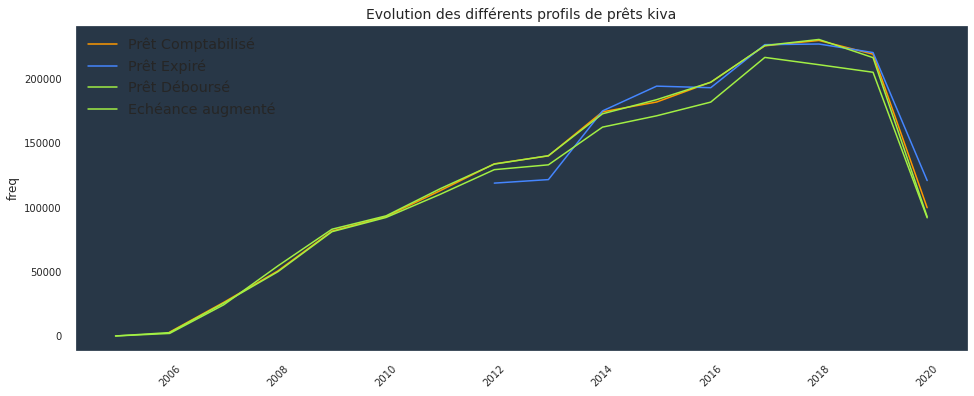

In [18]:
plt.figure(figsize=(16,6))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':10,'ytick.labelsize':10})
plt.title("Evolution des différents profils de prêts kiva",fontsize = 14)
plt.xticks(rotation=45) # Rotating X tickts by 45 degrees
sns.lineplot(x = df1.index.values, y = df1['freq'] , color = '#ff9900' , label= 'Prêt Comptabilisé')
sns.lineplot(x = df2.index.values, y = df2['freq'] , color = '#4586ff' , label = 'Prêt Expiré')
sns.lineplot(x = df3.index.values, y = df3['freq'] , color = '#a2ef44' , label = 'Prêt Déboursé')
sns.lineplot(x = df4.index.values, y = df4['freq'] , color = '#a2ef44' , label = 'Echéance augmenté')
plt.legend(facecolor= 'grey' , fontsize='large' , edgecolor = 'black' ,shadow=True) # Legend formatting
plt.show()

A partir de cette sortie, nous retraçons les activités de Kiva depuis sa création en 2005 jusqu'au 20/10/2020. Nous constatons que l'année 2018 représente celle où kiva a été le plus actif pour tous ses profils de prêts. Toutefois, il importe de noter que la crise du covid a significativement impacté négativement les activités de Kiva.

* Variables catégorielles

In [19]:
var_categoriel = ['LOAN_NAME','ORIGINAL_LANGUAGE','DESCRIPTION','DESCRIPTION_TRANSLATED','STATUS','ACTIVITY_NAME','SECTOR_NAME','LOAN_USE','COUNTRY_CODE','COUNTRY_NAME','TOWN_NAME','CURRENCY_POLICY','CURRENCY_EXCHANGE_COVERAGE_RATE','CURRENCY','TAGS','BORROWER_NAMES','BORROWER_GENDERS','BORROWER_PICTURED','REPAYMENT_INTERVAL','DISTRIBUTION_MODEL']
loan[var_categoriel] = loan[var_categoriel].astype('category')

In [20]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968819 entries, 0 to 1968818
Data columns (total 38 columns):
 #   Column                           Dtype              
---  ------                           -----              
 0   LOAN_ID                          int64              
 1   LOAN_NAME                        category           
 2   ORIGINAL_LANGUAGE                category           
 3   DESCRIPTION                      category           
 4   DESCRIPTION_TRANSLATED           category           
 5   FUNDED_AMOUNT                    float64            
 6   LOAN_AMOUNT                      float64            
 7   STATUS                           category           
 8   IMAGE_ID                         float64            
 9   VIDEO_ID                         float64            
 10  ACTIVITY_NAME                    category           
 11  SECTOR_NAME                      category           
 12  LOAN_USE                         category           
 13  COUNTRY_CODE

Une fois que nous connaissons le type de nos différentes variables, nous allons identifier celles qui ne seront
pas utiles pour nos analyses et les supprimer pour ne retenir que les plus pertinentes. Par exemple, les variables `ACTIVITY_NAME` ne rapportent pas trop d'information étant donné la disponibilité de la variable `SECTOR_NAME`; également pour la variable `IMAGE_ID`, on va préferer `BORROWER_PICTURED` qui renseigne si l'emprunteur a fourni sa photo ou pas.

In [21]:
# Liste des variables sans intérêt pour l'analyse
var_suprime = ['LOAN_NAME','ORIGINAL_LANGUAGE','IMAGE_ID','DESCRIPTION','ACTIVITY_NAME','TOWN_NAME','CURRENCY_POLICY','TAGS','BORROWER_NAMES']
#Suppression de ces dernières
loan_copy = loan.copy() # On fait une copie de la base pour toujours pouvoir avoir recours à la base source en cas de problème.
loan_copy = loan_copy.drop(var_suprime, axis=1)

print('Les dimensions de la nouvelle base de données sont :',loan_copy.shape)

Les dimensions de la nouvelle base de données sont : (1968819, 29)


## <span style="color:#F5B7B1"> Analyse globale de la base de donnée </span>

L'objet de cette partie est de ressortir les caractéristiques globales de la base de données en termes de missing values et duplicates. Par la suite, nous allons procéder à une analyse beaucoup plus fine au niveau de chaque de variable, ceci dans l'optique d'identifier les éventuelles valeurs abérrantes et autres.

* Missing values

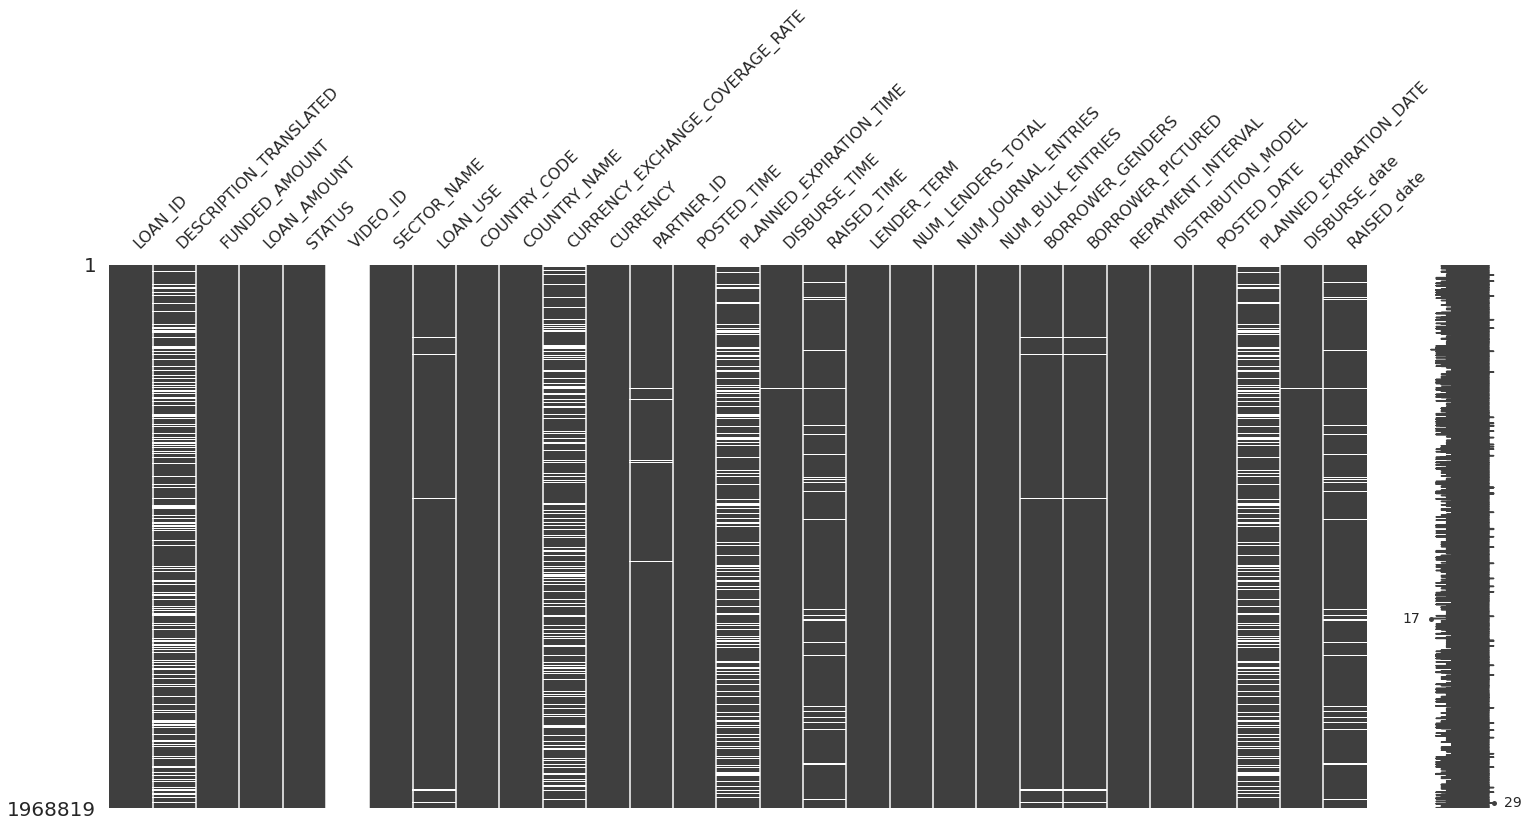

In [22]:
msno.matrix(loan_copy)

L'observation de cette sortie permet de constater que les variables `DESCRIPTION_TRANSLATED`, `VIDEO_ID`, `PLANNED_EXPIRATION_TIME`, `PLANNED_EXPIRATION_DATE` présentent beaucoup de valeurs manquantes. Etant donné leur faible apport informationnel dans nos analyses, nous allons nous en débarraser. Par ailleurs, notons aussi le cas de la variable **`CURRENCY_EXCHANGE_COVERAGE_RATE`** qui, certes importante pour les analyses, présente des valeurs manquantes. Pour cette dernière, nous allons la supprimer de la base de données et la remplacer par une variable avec un plus grand apport informationnel. En effet, dans la suite du travail, nous allons rechercher un site qui donne les taux de change des différentes monnaies par rapport à l'euro et scrapper cette page pour ajouter cette information à notre base de données.

In [23]:
var_supprime2 = ['DESCRIPTION_TRANSLATED','CURRENCY_EXCHANGE_COVERAGE_RATE','VIDEO_ID','PLANNED_EXPIRATION_TIME','PLANNED_EXPIRATION_DATE']
loan_copy = loan_copy.drop(var_supprime2, axis=1)

In [24]:
# Affichage des statistiques sur les missing values
total = loan_copy.isnull().sum().sort_values(ascending = False)
percent = (loan_copy.isnull().sum()/loan_copy.isnull().count()).sort_values(ascending = False)
missing_loans_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_loans_data[missing_loans_data['Total']!=0]

,Total,Percent
RAISED_date,104534,0.053095
RAISED_TIME,104534,0.053095
LOAN_USE,45639,0.023181
BORROWER_PICTURED,45616,0.023169
BORROWER_GENDERS,45616,0.023169
PARTNER_ID,20303,0.010312
DISBURSE_date,3822,0.001941
DISBURSE_TIME,3822,0.001941
COUNTRY_CODE,33,0.000017
LENDER_TERM,24,0.000012


Nous avons les statistiques sur les valeurs manquantes des variables qui pourront potentiellement être entrées dans la construction de notre modèle de prédiction. Afin de bien comprendre le mécanisme de génération de ces valeurs manquantes et de les inputer dans le cas de détection d'une règle correcte, nous allons étudier au cas par cas ces variables.

* Duplicates

In [25]:
## Nombre de données dupliqués sur la base des id
loan_copy.duplicated(subset=['LOAN_ID' ]).sum()

0

Nous pouvons voir que notre base de données ne contient pas d'observations dupliquées. Autrement dit, chaque prêt est identifiable par son identifiant.

## <span style="color:#F5B7B1"> Analyses spécifiques des variables </span>
Dans cette partie, nous allons procéder aux éventuelles recodifications, renomages et traitements des variables qui présentent des incohérences. Dans un premier temps, nous allons nous intéresser aux variables catégorielles ; par la suite, nous mettrons le focus sur les variables quantitatives.

### <span style="color:#FED2CA"> Traitement des variables qualitatives </span>


In [26]:
loan_copy.columns

Index(['LOAN_ID', 'FUNDED_AMOUNT', 'LOAN_AMOUNT', 'STATUS', 'SECTOR_NAME',
       'LOAN_USE', 'COUNTRY_CODE', 'COUNTRY_NAME', 'CURRENCY', 'PARTNER_ID',
       'POSTED_TIME', 'DISBURSE_TIME', 'RAISED_TIME', 'LENDER_TERM',
       'NUM_LENDERS_TOTAL', 'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES',
       'BORROWER_GENDERS', 'BORROWER_PICTURED', 'REPAYMENT_INTERVAL',
       'DISTRIBUTION_MODEL', 'POSTED_DATE', 'DISBURSE_date', 'RAISED_date'],
      dtype='object')

* ***Statut du prêt*** : 
Cette variable représente la variable centrale de l'étude, car c'est elle que l'on cherchera à expliquer par la suite grâce aux modèles prédictifs que l'on mettra en oeuvre. De ce fait, en accord avec la [revue de littérature](#revue), après avoir présenté quelques statistiques brèves sur cette dernière, nous allons la recodifier tel que précédemment indiqué.

In [27]:
pd.crosstab(loan_copy.STATUS,'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
STATUS,
expired,4.61
fundRaising,0.56
funded,94.37
refunded,0.45


Nous voyons bien que les prêts remboursés représentent l'origine de l'activité de Kiva. En effet, ces derniers représentent `94,37%` des prêts de la structure. Le taux de défaut des clients de Kiva sur la période d'étude est de `4,61%`. Ainsi, dans la partie modélisation, afin de construire notre modèle prédictif sur cette variable, nous adopterons un comportement bien précis et concis en adéquation avec les études réalisées dans ce cas de figure.

Comme précisé dans la [revue](#revue), nous allons à présent recodifier cette variable afin d'avoir les entrepreneurs ayant fait défaut et ceux qui ne sont pas dans cette situation.

In [28]:
# création de la variable target
loan_copy['target'] = np.where(loan_copy['STATUS'] == 'expired', 0, 1)
#labelisation
labels = { 0 : 'defaut', 1 : 'succes'}
loan_copy['target'].apply(labels.get)
pd.crosstab(loan_copy['target'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
target,
0,4.61
1,95.39


Le taux de défaut global des emprunteurs de kiva est de `4,61%`. Par la suite, nous allons tirer un échantillon dans le groupe des entrepreneurs à succès pour construire les différents modèles.

* Secteur d'activité : 

In [29]:
print(' Nous avons au total', len(loan_copy.SECTOR_NAME.unique()), " différents secteurs d'activités supportés par le financement de kiva",
     "\n En termes d'activités impactées par kiva, elles sont au nombre de : ",len(loan['ACTIVITY_NAME'].unique()),'activités.')

 Nous avons au total 15  différents secteurs d'activités supportés par le financement de kiva 
 En termes d'activités impactées par kiva, elles sont au nombre de :  163 activités.


In [30]:
pd.crosstab(loan_copy['SECTOR_NAME'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
SECTOR_NAME,
Agriculture,25.47
Arts,2.02
Clothing,5.43
Construction,1.22
Education,3.50
Entertainment,0.13
Food,22.00
Health,1.42
Housing,5.26


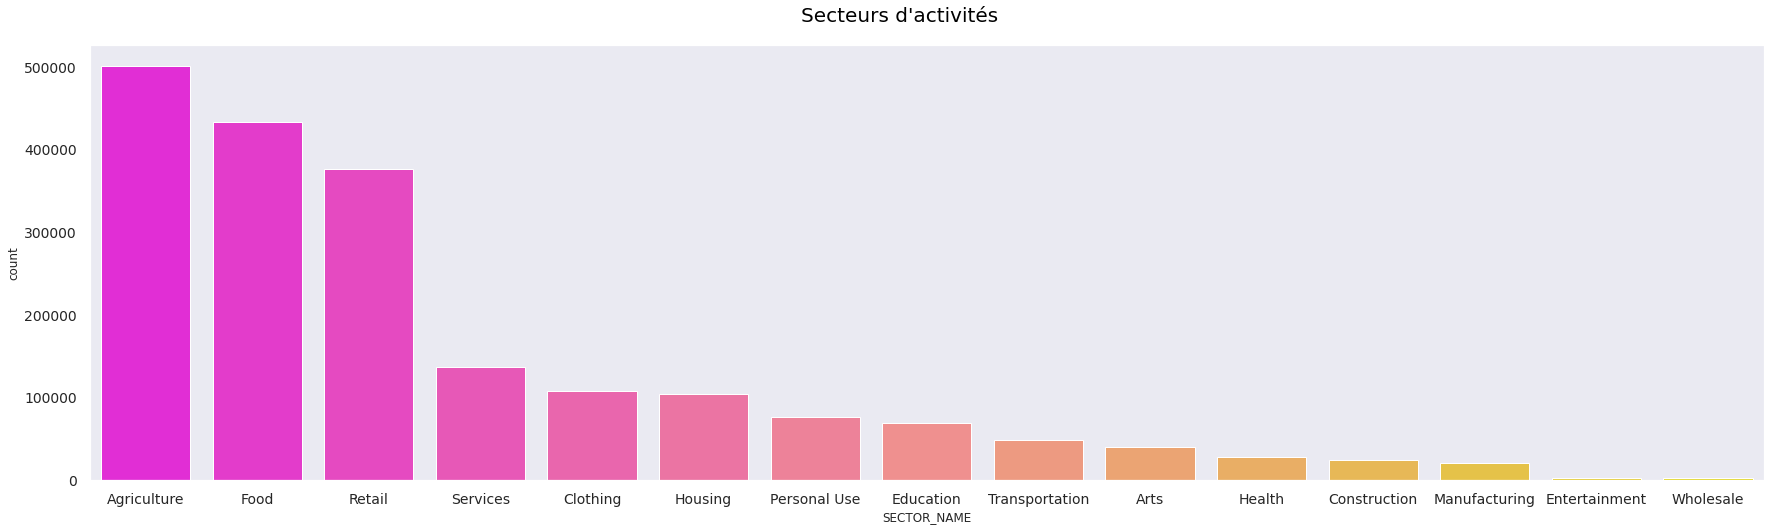

In [31]:
plt.figure(figsize=(30,8))
sns.set(rc={"axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})
plt.gcf().text(.5, .93, "Secteurs d'activités", fontsize = 20, color='black' ,ha='center', va='center')
ax = sns.countplot(x=loan_copy['SECTOR_NAME'] , order =loan_copy['SECTOR_NAME'].value_counts().index , palette="spring")

plt.show()

Etant donné que les pays sous-développés sont caractérisés par la forte dépendance au secteur agricole, les données de kiva retracent parfaitement cette réalité. En effet, l'agriculture est le secteur d'activité le plus financé ; à lui seul, il représente la destination de `25%` des prêts aux entrepreneurs demandeurs de fonds à kiva. Ce secteur est sécondé par le secteur alimentaire qui représente près de `22%` des prêts de la structure. Les secteurs manufacturier, du divertissement et des grossistes sont les moins représentés avec respectivement des parts de `1,01%`, `0,13%` et `0,12%`.

Compte tenu du grand nombre de modalités de cette variable, nous allons la recodifier. Comme procédé de recodification, nous allons rechercher un équilibre en termes de fréquences entre les différentes modalités. Ainsi, les 3 modalités les plus représentatives seront laissées telles qu'elles ; les modalités `Clothing`; `Housing` et `Personnal Use` seront regroupées en la modalité `Bien_Menage`  et les autres modalités serons dans la modalité `autre`.


In [32]:
Bien_Menage = ['Clothing','Housing','Personnal Use']
autre_secteur = ['Services','Education','Transportation','Arts','Health','Construction','Manufacturing','Entertainment','Wholesale']
conditions = [
    (loan_copy.SECTOR_NAME == 'Agriculture'),
    (loan_copy.SECTOR_NAME == 'Food'),
    (loan_copy.SECTOR_NAME == 'Retail'),
    (loan_copy.SECTOR_NAME == 'Clothing') | (loan.SECTOR_NAME == 'Housing') | (loan.SECTOR_NAME == 'Personal Use'),
    (loan_copy.SECTOR_NAME == 'Services') | (loan.SECTOR_NAME == 'Education') | (loan.SECTOR_NAME == 'Transportation') | (loan.SECTOR_NAME == 'Arts') | (loan.SECTOR_NAME == 'Health') | (loan.SECTOR_NAME == 'Services') | (loan.SECTOR_NAME == 'Construction') |  (loan.SECTOR_NAME == 'Manufacturing') | (loan.SECTOR_NAME == 'Entertainment') | (loan.SECTOR_NAME == 'Wholesale')
]
values = ['Agriculture','Food','Retail','Bien_Menage','autre_secteur']
loan_copy.SECTOR_NAME = np.select(conditions, values)

pd.crosstab(loan_copy['SECTOR_NAME'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
SECTOR_NAME,
Agriculture,25.47
Bien_Menage,14.57
Food,22.00
Retail,19.10
autre_secteur,18.87


Text(0.5, 1.0, 'Distribution of sectors')

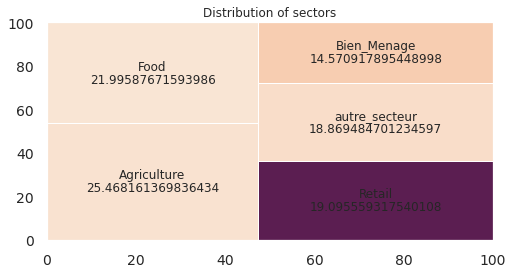

In [34]:
plt.figure(figsize=(8,4))
count = loan_copy['SECTOR_NAME'].value_counts()
squarify.plot(sizes=count.values,label=count.index, value=100*(count.values/len(loan_copy['SECTOR_NAME'])))
plt.title('Distribution of sectors')

* **Monnaie utilisée** : 
Comme observé dans la partie analyse globale, la variable `taux de change` de la base de données présentait beaucoup de valeurs manquantes et ne répondait pas à nos attentes. Ainsi, nous avons choisi de la supprimer. Nous allons ici compléter notre base de données avec une variable taux de change qui sera issue d'une opération de webscrapping sur une page web. Lors de ce processus de recupération des informations online et de l'ajout de ces derniers à notre base de données, nous allons explorer la variable `currency` en corrigeant les éventuelles erreurs sur cette dernière.

#### Conversion des monnaies en euro
Dans l'optique de disposer de la variable taux d'échange qui permettra la conversion de toutes les monnaies présentes en **`euro (€)`** , nous faisons le scraping sur ce site : https://www.xe.com/en/currencytables/?from=EUR et utilisons `BeautifulSoup` pour "comprendre" le texte ainsi scrappé.

In [35]:
url = 'https://www.xe.com/en/currencytables/?from=EUR'
request_text = request.urlopen(url).read()
page = BeautifulSoup(request_text, 'lxml')
#print(page.prettify())

tableau = page.find('div', class_='historicalRateTable-wrap')
#print(tableau)

# Récupération des abréviations des différentes monnaies
CURRENCY = []
for currency in tableau.tbody.findAll('tr'):
    CURRENCY.append(currency.a.text)

In [36]:
# Récuration des taux de convertions
exchange = []
for taux in tableau.tbody.findAll('tr'):
    exchange.append(taux.find('td',class_='historicalRateTable-rateHeader').text)
    
#Assemblement de ces listes dans le tableau final
result_currency = pd.DataFrame(columns=['CURRENCY','taux_euro'])
result_currency['CURRENCY'] = CURRENCY
result_currency['taux_euro'] = exchange
result_currency.head()

,CURRENCY,taux_euro
0,USD,1.2154338611
1,EUR,1.0000000000
2,GBP,0.9036746295
3,INR,89.4254679292
4,AUD,1.6083594572


In [37]:
## Ajout des variables à la base de donnée
currency_database = pd.unique(loan_copy['CURRENCY']).tolist()
print(' Le nombre totale de monnaies est de : ',len(CURRENCY),
     '\n Le nombre de monnaies présent dans notre base de donnée est :',len(currency_database),
     "\n On s'attend à avoir exactement <<", len(CURRENCY) - len(currency_database),">> monnaies qui ne sont pas dans les deux listes." )

 Le nombre totale de monnaies est de :  167 
 Le nombre de monnaies présent dans notre base de donnée est : 78 
 On s'attend à avoir exactement << 89 >> monnaies qui ne sont pas dans les deux listes.


In [38]:
len(list(set(CURRENCY) - set(currency_database))) # La taille de la différence entre les deux listes.

91

On constate qu'il y'a deux monnaies présentes dans notre base de données qui ne sont pas dans la liste complète des monnaies. Ainsi, on présuppose que ces dernières ont été mal libellées. Identifions ces monnaies.

In [39]:
# Boucle pour identifier les libellés des monnnaies érronés.
currency_error = []
for i in currency_database:
    if i not in CURRENCY:
        currency_error.append(i)
        print(i)

SSP
ZMK


A l'observation de ces derniers, on peut supposer que `ZMK` correspond plutôt à `ZMW` qui est la monnaie de `Zambian Kwacha` sur le site de référence. Afin de s'affranchir de toute confusion nous allons identifer les pays qui ont ces monnaies, se reférer à la table et par suite les remplacer.

In [40]:
# Recherhe de l'index des pays ayant une monnaie mal renseignée
index_erreur = []
for j in range(len(loan_copy.COUNTRY_NAME)):
    for k in range(len(currency_error)):
        if currency_error[k] == loan_copy.CURRENCY[j]:
            index_erreur.append(loan_copy.COUNTRY_NAME[j])

In [41]:
pays_1 = index_erreur[0]
for i in range(len(index_erreur)):
    if index_erreur[i]!=pays_1:
        print('Les pays ayant un libellé de monnaie mal renseigné sont : ', 
              '\n * ',pays_1,
              '\n * ',index_erreur[i])
        break

Les pays ayant un libellé de monnaie mal renseigné sont :  
 *  South Sudan 
 *  Zambia


Ainsi, on voit bien que les deux pays pour lesquels les monnaies on été mal libellées sont le `South Sudan` et la `Zambia`. Ainsi, on voit bien que la précédente intuition était correcte. En outre, il importe de souligner l'importance d'avoir fait ce travail, car la suppression de ces pays aurait empiété négativement sur la performance du modèle à mettre sur pieds.

Dans le site de référence, la monnaie du `South Sudan` est appelée `Sudanese Pound` et est abbrégée `SDG`. Par la suite, dans notre base de données, nous allons effectuer les changements suivants sur la variable currency :
* `SSP` en `SDG`
* `ZMK` en `ZMW`

In [42]:
print(" On vérifie si les libéllés 'SDG' et 'ZMK' étaient déjà dans la liste de la base de données. :",
      '\n*  SDG in list : ', 'SDG' in currency_database,
     '\n*  ZMW in list : ', 'ZMK' in currency_database)

 On vérifie si les libéllés 'SDG' et 'ZMK' étaient déjà dans la liste de la base de données. : 
*  SDG in list :  True 
*  ZMW in list :  True


Ainsi on voit qu'effectivement les deux libéllés étaient déjà présents dans la base de données, ces erreurs pourraient probablement avoir pour origine une erreur de saisie. 

In [43]:
# Remplace les libelés de monnaie de la base donnée
loan_copy['CURRENCY'] = loan_copy['CURRENCY'].replace({'SSP': 'SDG', 'ZMK': 'ZMW'})
new_currency_database = pd.unique(loan_copy['CURRENCY']).tolist()

len(new_currency_database)

76

A ce niveau, on est bien certains que tous les libellés de monnaies présents dans la base de données le sont également dans le libellé au niveau internationnal. Nous allons ajouter la base de données scrappée, contenant le taux de change des monnaies par rapport à l'euro à notre base de donnéee.

In [44]:
# Conversion de la colonne new_currency_database en base de données
df1 = pd.DataFrame({'col':new_currency_database})
# Fusion des bases de données pour en retenir uniquement les monnaies des présentes dans la base de données
currency = pd.merge(result_currency, df1, how = 'right', left_on = ['CURRENCY'],right_on = ['col']).sort_values('CURRENCY')

# Ajout de la variable taux de change à la base de données
loan_copy = pd.merge(loan_copy, currency, on='CURRENCY', how='outer')

Maintenant que nous avons le taux de conversion des différentes monnaies en euro, nous allons diviser toutes les variables
concernant les montants libéllés en monnaies nationales par l'euro. Rappelons que l'importance de cette démarche réside dans la facilité des interprétations qu'elle procure. En outre, grâce à cette conversion, les interprétations, analyses et comparaisons serons beaucoup plus claires.

* **Sexe de l'emprunteur**

In [45]:
len(pd.unique(loan_copy['BORROWER_GENDERS']))

24167

On constate que la variable sexe a 24 167 modalités. Nous allons comprendre cette erreur et la corriger car cette variable pourrait avoir un grand pouvoir informationnel d'après la littérature.

In [46]:
pd.crosstab(loan_copy['BORROWER_GENDERS'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
BORROWER_GENDERS,
female,63.53
"female, female",1.40
"female, female, female",1.40
"female, female, female, female",1.08
"female, female, female, female, female",1.08
...,...
"male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male",0.00
"male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male",0.00
"male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, male, female, male, male, male",0.00


In [47]:
pd.crosstab(loan_copy['BORROWER_GENDERS'].isna(),'freq')

col_0,freq
BORROWER_GENDERS,
False,1923203
True,45616


Pour cette variable, nous avons 45 616 observations non renseignées. Etant donnée la distribution des erreurs au niveau des observations renseignées, nous soupçonnons ces dernieres de contenir de l'information sur le mécanisme générateur des valeurs manquantes. Ainsi, pour bien comprendre le mecanisme générateur de ces valeurs manquantes et les erreurs sur les modalités de cette variable, nous procédons à unevisualisation beaucoup plus large de cette variable.

In [48]:
# Configuration pour permettre l'affichage de plusieurs lignes
pd.set_option('display.max_rows', None)

In [49]:
# Affichage des 100 premières observations pour comprendre la structure des données
loan_copy['BORROWER_GENDERS'][:100]

0                                                female
1                                                female
2                                                female
3                                                female
4                                                female
5                                                female
6                                                female
7                                                female
8                                                female
9                                                female
10                                               female
11                                               female
12                                               female
13                                               female
14                                               female
15                                               female
16                                                  NaN
17                                              

In [50]:
pd.reset_option('^display.', silent=True) # Remet l'option d'affichage par défaut

Comme on peut le voir avec cette sortie, les soupçons précédement émis s'avèrent faux. En effet, les observations autour de la valeurs manquantes sont très bien renseignées. Ceci ne nous indique pas spécifiquement l'origine de ces dernières. Ainsi, pour la suite, nous allons les supprimer par manque d'informations additionnelles pour procéder à une éventuelle imputation. En outre, concernant les observations renseignées, ces dernières aussi posent un problème. En effet, comme on peut l'observer aux lignes `17`, `23` et `54`, une observation erronée contient à la fois la modalité **homme** et **femme**. Afin d'être cohérents dans notre démarche, nous allons uniquement retenir la première occurence. C'est-à-dire que pour les observations susmentionnées, nous allons en retenir respectivement : `female`, `male`.

Nous allons dans la suite, dans un premier temps supprimer les observations ayant les valeurs manquantes pour la variable `Gender` sur la base totale. Ensuite, nous  allons procéder à la correction des modalités de cette variable.

In [51]:
# Suppression des missings values
loan_copy = loan_copy.dropna(how='all', subset=['BORROWER_GENDERS'])

In [52]:
sexe = loan_copy['BORROWER_GENDERS'].tolist()
len(sexe); sexe[0].split(',')[0]

'female'

In [53]:
# Boucle qui permet de recupérer la première occurence de chaque modalité
sexe_correct = []
for i in range(len(sexe)):
    sexe_correct.append(sexe[i].split(',')[0])

In [54]:
loan_copy['BORROWER_GENDERS'] = sexe_correct

In [55]:
print(' Le nombre de modalités de la variable est de : ',len(loan_copy['BORROWER_GENDERS'].unique()),
      "\n Le nombre d'observations de la variable est de :  ",len(loan_copy['BORROWER_GENDERS']))

 Le nombre de modalités de la variable est de :  3 
 Le nombre d'observations de la variable est de :   1923203


In [56]:
pd.crosstab(loan_copy['BORROWER_GENDERS'],'freq')

col_0,freq
BORROWER_GENDERS,
female,1474910
male,448257
unspecified,36


Comme on peut le constater, il y'a encore une modalité incorrecte à savoir `unspecified`. Nous allons encore supprimer toutes les observations de la base de données correspondant à cette modalité.

In [57]:
loan_copy.drop(loan_copy.index[loan_copy['BORROWER_GENDERS'] == 'unspecified'], inplace = True)

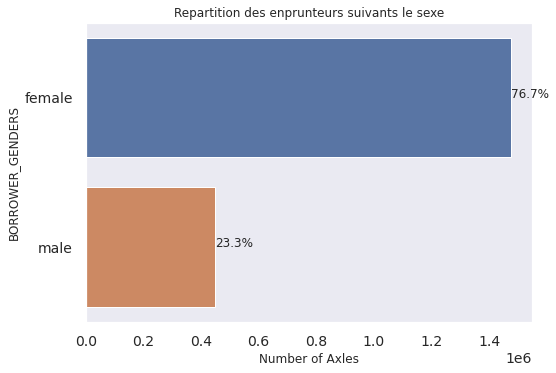

In [58]:
ax = sns.countplot(y="BORROWER_GENDERS", data=loan_copy)
plt.title('Repartition des enprunteurs suivants le sexe')
plt.xlabel('Number of Axles')

total = len(loan_copy['BORROWER_GENDERS'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

Comme l'illustre cette sortie graphique, on voit bien que la plupart des entrepreneurs des pays sous-dévéloppés qui empruntent des fonds d'investissements chez kiva sont les femmes. Ceci est en parfaite adéquation avec les résultats du secteur d'activités où il en est ressorti que le secteur le plus impacté par les prêts de kiva est le `secteur agricole`. Car, dans ces pays, les femmes sont généralement plus présentes dans le secteur agricole.

* **L'utilisation du prêt** : Cette variable revêt un caractère très important pour cette étude car elle permet de savoir l'utilisation qui est faite des fonds que kiva met à la disposition de ses emprunteurs. Ainsi, nous allons nous atteler à bien comprendre l'information enfouie dans cette dernière. Pour y parvenir, étant que cette variable résulte d'une question ouverte, nous allons faire appel aux techniques de **`NLP (Natural Language Processing)`** pour extraire les informations contenues dans cette variable. En adéquation avec cette article qui explique les différentes étapes et l'intérêt du NLP pour la compréhension du langage humain par la machine (https://medium.com/@ageitgey/natural-language-processing-is-fun-9a0bff37854e), la réalisation de notre algorithme va suivre les étapes suivantes : 
- **La détection de la langue**
- **La "tokenisation"**
- **La suppression des "stop-words"**
- **La lemmatisation**

#### La détection de la langue : 
Nous allons commencer par supprimer les valeurs manquantes de cette variable. Ensuite, il est important de déterminer la langue dans laquelle la description du prêt est rédigée. Ceci permettra d'utiliser le dictionnaire adéquat lors de la réalisation des prochaines étapes.

In [59]:
# Recherche des valeurs manquantes de la série (différente de la méthoe traditionnelle)
description = loan_copy['LOAN_USE'].tolist()
desc_pb = []
for myst in description:
    if isinstance(myst,float): # Les variables nan sont de type float 
        desc_pb.append(myst)

print(' Ainsi on obtient ', len(desc_pb),' valeurs manquantees.',
     "\n Etant donnée l'importance de cette variable, nous allons supprimer toutes les observations présentant des valeurs manquantes.")

 Ainsi on obtient  23  valeurs manquantees. 
 Etant donnée l'importance de cette variable, nous allons supprimer toutes les observations présentant des valeurs manquantes.


In [60]:
loan_copy = loan_copy.dropna(how='all', subset=['LOAN_USE'])

# Affichage d'une ligne de la série
loan_copy.at[100,'LOAN_USE']

'to purchase more items to sell.'

In [61]:
# Taille des message de description du prêt
loan_copy['length'] = loan_copy['LOAN_USE'].map(len,)
#groupe suivant le statut du prêt
loan_copy.groupby('target').length.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,90782.0,66.556884,34.295801,1.0,41.0,61.0,86.0,371.0
1,1832362.0,58.432654,30.991035,1.0,36.0,52.0,74.0,2149.0


Cette sortie permet de mettre en évidence la correlation entre la taille de la description du prêt et le fait d'être en défaut ou non. Comme on le voit, la taille de la description des emprunts à succès est beaucoup plus grande que celle des emprunts défaillants. Toutefois, il importe de noter le caractère falacieux de cette corrélation car la variable profil de l'emprunteur ne discrimine pas bien la population (seulement 4% sont en défaut). 

Ainsi, étant donnée la complexité et demande en capacité exécive des algorithmes d'application du **`NLP`**, cette partie sera adordée dans le détail dans la partie **`Analyse exploratoire`**.

* **Pays de destination du prêt** : 

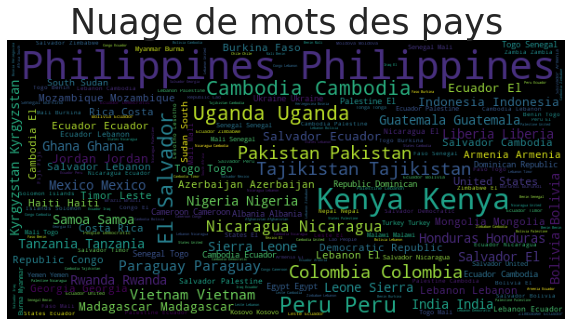

In [62]:
names = loan_copy["COUNTRY_NAME"][~pd.isnull(loan_copy["COUNTRY_NAME"])]
#print(names)
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(names))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.title("Nuage de mots des pays", fontsize=35)
plt.axis("off")
plt.show() 

De cette sortie de nuage graphique, on voit clairement que les `philippine` sont le pays ayant le plus d'entrepreneurs financés par kiva. Aussi, il apparait clairement que les pays tels que le `Kenya`, la `Colombie`, l'`Ouaganda`, `El salvador` ne sont pas en reste. Afin d'avoir davantage d'informations, nous allons faire une représentation graphique avec les différentes proportions.

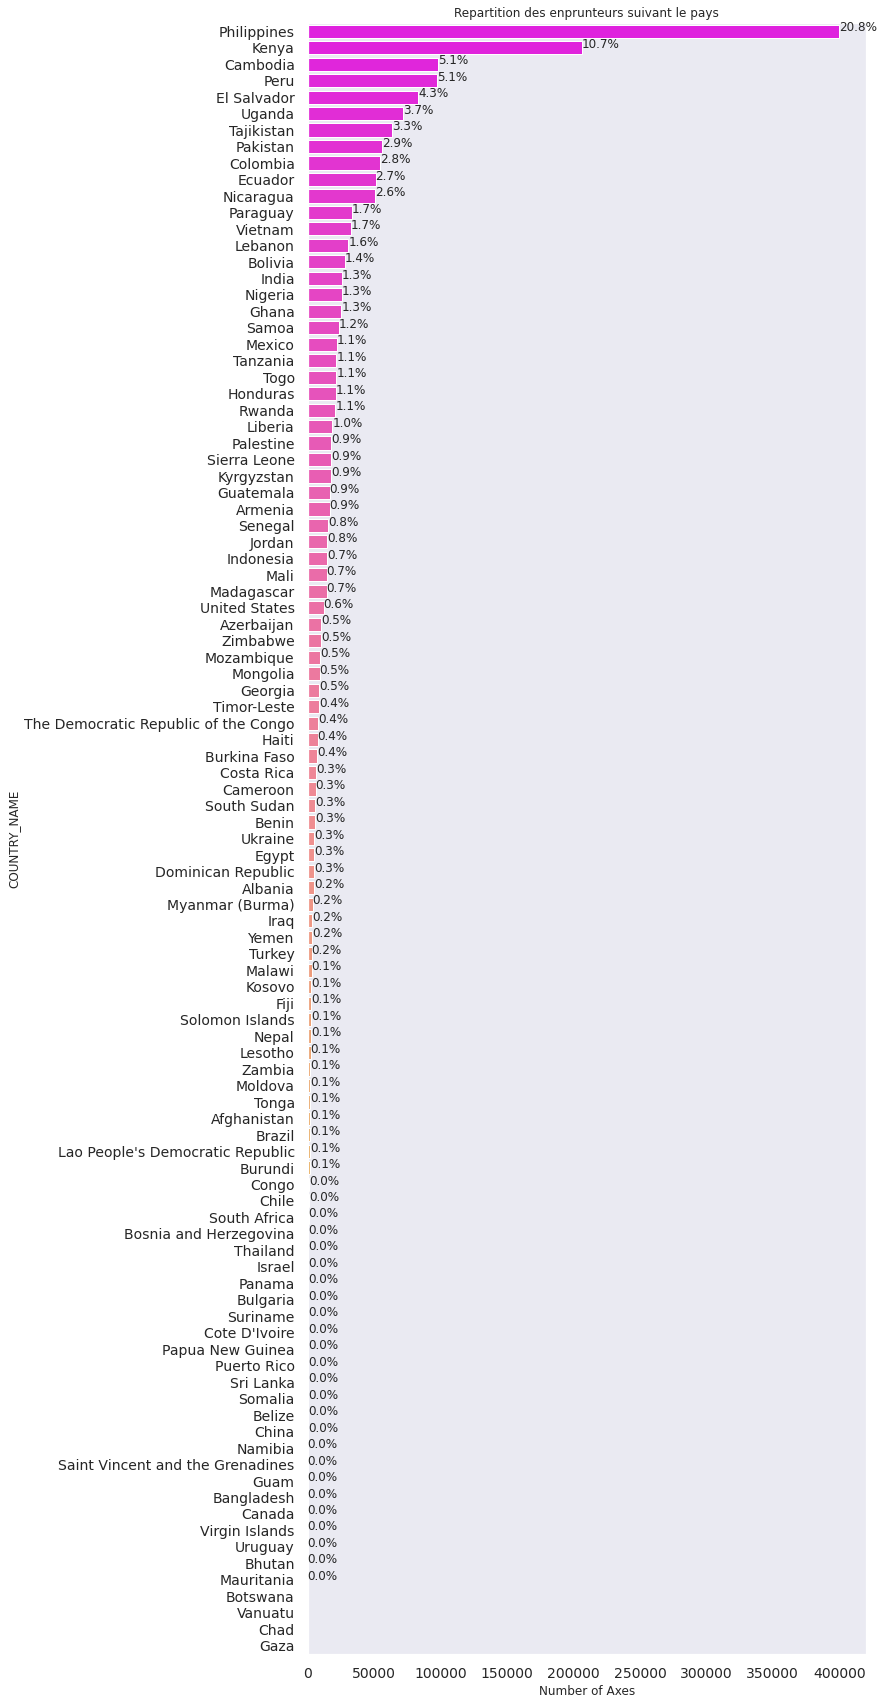

In [63]:
plt.figure(figsize=(10,30))
ax = sns.countplot(y="COUNTRY_NAME", data=loan_copy, order =loan_copy['COUNTRY_NAME'].value_counts().index , palette="spring")
#ax = sns.countplot(x=loan_copy['SECTOR_NAME'] )

plt.title('Repartition des enprunteurs suivant le pays')
plt.xlabel('Number of Axes')

total = len(loan_copy['COUNTRY_NAME'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

A l'observation de ce graphique, il ressort que sur la période d'étude, l'activité de kiva à touché **`95 pays`**. Parmi ces pays, ceux ayant été les plus dynamiques sont : `Philippines`, `Kenya`, `Cambodia`, `peru` et `El Salvador`. De ce fait, ces 5 pays sont ceux ayant les plus grands nombres d'entrepreneurs qui ont kiva comme source de financement. Par la suite, dans l'optique d'avoir une mailleure vision de l'impact du travail de kiva, nous optons pour une représentation graphique beaucoup plus expressive. En effet, nous nous donnons pour ambittion de faire une représentation spatiale des pays en utilisant leurs coordonnées géographiques (longitude, latitude). Cette représentation présente le fort intérêt de nous permettre de faire une recodification de la variable en continent, ainsi, elle pourra être prise en compte dans la modélisation. 

Pour parvenir à la réalisaiton de ce challenge, nous allons, dans un premier temps, rechercher l'information en ligne sur les coordonnées géographiques des différents pays. Par la suite, nous utiliserons les bibliothèques adéquates pour faire la représentation graphique. Les informations à scrapper sont disponibles à l'adresse suivante : https://developers.google.com/public-data/docs/canonical/countries_csv.

In [64]:
url_pays = 'https://developers.google.com/public-data/docs/canonical/countries_csv'
request_text = request.urlopen(url_pays).read()
pays = BeautifulSoup(request_text, 'lxml')
#print(pays.prettify())

In [65]:
tab_pays = pays.find('div', class_='devsite-article-body clearfix ').table
#print(tab_pays)

In [66]:
# Définition de la latitude, longitude & code du pays
code = []
lat = []
long = []
for l in tab_pays.findAll('tr'):
    code.append(l.text.split('\n')[1])
    lat.append(l.text.split('\n')[2])
    long.append(l.text.split('\n')[3])

In [67]:
#Assemblement de ces listes dans le tableau final
data_pays = pd.DataFrame(columns=['code_pays','latitude','longitude'])
data_pays['code_pays'] = code[1:]
data_pays['latitude'] = lat[1:]
data_pays['longitude'] = long[1:]
data_pays.head()

,code_pays,latitude,longitude
0,AD,42.546245,1.601554
1,AE,23.424076,53.847818
2,AF,33.93911,67.709953
3,AG,17.060816,-61.796428
4,AI,18.220554,-63.068615


In [68]:
# On recherche si l'ensemble des codes des pays dans la base de données sont corrects
code_db = loan_copy['COUNTRY_CODE']
code_pb = []
for i in code_db:
    if i not in code:
        code_pb.append(i)


In [69]:
used = []
unique = [used.append(x) for x in code_pb if x not in used]
used

['SS', nan]

On constate bien que les valeurs de codes pays ne figurant pas dans la liste des codes de pays sont les valeurs manquantes (`nan`) et le code `SS`. Pour les valeurs manquantes, nous allons vérifier si nous avons de l'information sur le pays de ces derniers et les imputer par le code correspondant, le cas échéant, ils seront tout simplement supprimés de la base de données. Concernant le code `SS`, nous soupçonnons qu'il s'agit du code du `Soudan du Sud`.

In [70]:
print('Le pays ayant un code pays SS est : ', loan_copy.query('COUNTRY_CODE == "SS"')['COUNTRY_NAME'].unique())

Le pays ayant un code pays SS est :  ['South Sudan']
Categories (1, object): ['South Sudan']


In [71]:
print(" Le pays pour lequel le code n'est pas renseigné est : ",loan_copy[loan_copy['COUNTRY_CODE'].isna()]['COUNTRY_NAME'].unique(),
      "\n Le nombre de valeurs manquantes de la variable nom du pays est : ",loan_copy[loan_copy['COUNTRY_NAME'].isna()].shape[0])

 Le pays pour lequel le code n'est pas renseigné est :  ['Namibia']
Categories (1, object): ['Namibia'] 
 Le nombre de valeurs manquantes de la variable nom du pays est :  0


In [72]:
# Imputation du code pays
loan_copy['COUNTRY_CODE'] = np.where(loan_copy['COUNTRY_CODE'] == 'SS','SD',loan_copy['COUNTRY_CODE'])
loan_copy['COUNTRY_CODE'] = np.where(loan_copy['COUNTRY_CODE'].isna(),'NA',loan_copy['COUNTRY_CODE'])

In [73]:
code_pays_dbase = pd.unique(loan_copy['COUNTRY_CODE']).tolist()
nom_pays_dbase = pd.unique(loan_copy['COUNTRY_NAME']).tolist()
# Conversion de la colonne new_currency_database en base de donnée
df_code = pd.DataFrame({'COUNTRY_CODE':code_pays_dbase, 'COUNTRY_NAME':nom_pays_dbase})
# Fusion des bases de données pour en retenir uniquement les monnaies des présentes dans la base de données
COORD_GEO = pd.merge(data_pays, df_code, how = 'right', left_on = ['code_pays'],right_on = ['COUNTRY_CODE']).sort_values('COUNTRY_CODE')

In [74]:
# Ajout des colonnes nom pays et posted_date pour la représentation graphique
COORD_GEO.reset_index()
df = loan_copy.groupby(['COUNTRY_NAME','POSTED_DATE']).LOAN_AMOUNT.describe()
df.reset_index(inplace=True)
df.tail()

,COUNTRY_NAME,POSTED_DATE,count,mean,std,min,25%,50%,75%,max
901,Zimbabwe,2015,590.0,1208.813559,648.472372,400.0,1000.0,1000.0,1450.0,6100.0
902,Zimbabwe,2016,785.0,1029.745223,1810.598651,350.0,500.0,1000.0,1200.0,50000.0
903,Zimbabwe,2017,1079.0,1102.548656,615.122687,100.0,500.0,1000.0,1400.0,5700.0
904,Zimbabwe,2018,2829.0,733.677978,753.888307,100.0,200.0,400.0,1100.0,15000.0
905,Zimbabwe,2019,1706.0,737.719812,753.403414,150.0,200.0,500.0,1050.0,5600.0


Comme on peut le voir à travers cette sortie, nous sommes en présence d'une **base wide** (pour chaque année nous avons les données des différents pays), cette représentation des données ne convient pas à la représentation que nous souhaitons faire. Ainsi, nous allons opter pour une base en **long** (à chaque date, on aura la valeur de posted_date dans chaque pays). Dans cette base temporelle obtenue, nous allons choisir la période 2006, 2010, 2015 et 2020 pour faire la représentation des activités de kiva au niveau mondial.

In [75]:
dataTime = df.pivot(index='COUNTRY_NAME', columns='POSTED_DATE', values='count')
period = [2006,2010,2015,2020]
dataTime[period].tail()

POSTED_DATE,2006,2010,2015,2020
COUNTRY_NAME,,,,
Vietnam,NaN,593.0,2769.0,1592.0
Virgin Islands,NaN,NaN,NaN,NaN
Yemen,NaN,NaN,228.0,NaN
Zambia,NaN,NaN,164.0,250.0
Zimbabwe,NaN,NaN,590.0,NaN


Les valeurs manquantes observées sont tout à fait normales, car elles indiquent que le pays n'a pas eu d'entrepreneur qui a demandé ou s'est fait octroyé un prêt de la part de Kiva. Nous allons donc les remplacer par des 0.

In [76]:
base = dataTime.fillna(0)[period]
base.reset_index(inplace=True)

# Fusion de la base de données COORDONNEE GEOGRAPHIQUE avec les prêts par pays
COORD_GEO = pd.merge(COORD_GEO,base,how='left',left_on = 'COUNTRY_NAME',right_on='COUNTRY_NAME')
COORD_GEO.head(2)

,code_pays,latitude,longitude,COUNTRY_CODE,COUNTRY_NAME,2006,2010,2015,2020
0,AF,33.93911,67.709953,AF,Afghanistan,0.0,291.0,0.0,0.0
1,AL,41.153332,20.168331,AL,Albania,0.0,0.0,630.0,437.0


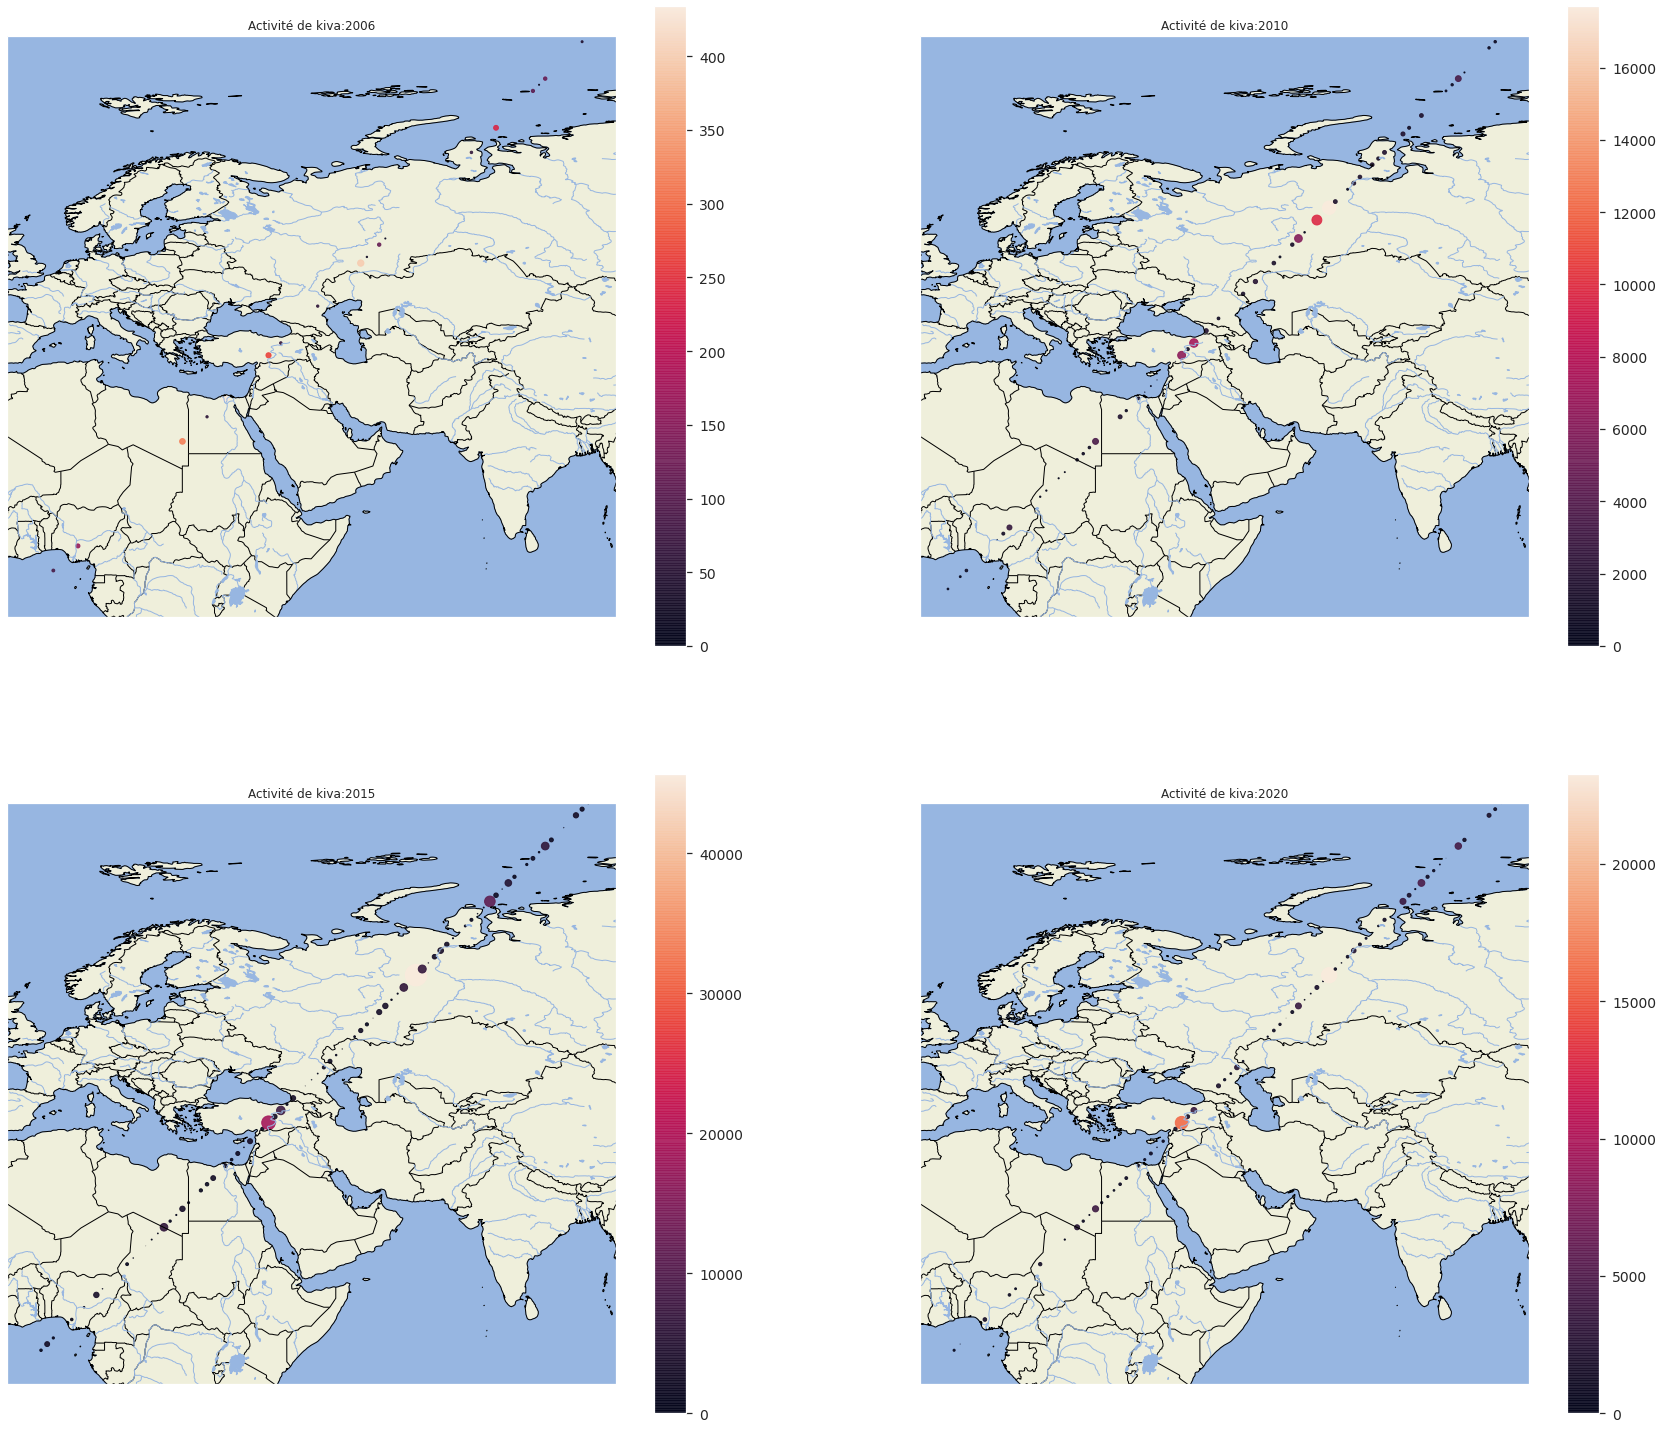

In [78]:
resolution = "50m"
BORDERS = NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land',
                              resolution, edgecolor='black', facecolor='none')
STATES = NaturalEarthFeature('cultural', 'admin_1_states_provinces_lakes',
                             resolution, edgecolor='black', facecolor='none')
COASTLINE = NaturalEarthFeature('physical', 'coastline', resolution,
                                edgecolor='black', facecolor='none')
LAKES = NaturalEarthFeature('physical', 'lakes', resolution,
                            edgecolor='face',
                            facecolor=COLORS['water'])
LAND = NaturalEarthFeature('physical', 'land', resolution,
                           edgecolor='face',
                           facecolor=COLORS['land'], zorder=-1)
OCEAN = NaturalEarthFeature('physical', 'ocean', resolution,
                            edgecolor='face',
                            facecolor=COLORS['water'], zorder=-1)
RIVERS = NaturalEarthFeature('physical', 'rivers_lake_centerlines', resolution,
                             edgecolor=COLORS['water'],facecolor='none')

annee = [2006, 2010, 2015, 2020]
x,y= np.array(COORD_GEO['longitude']), np.array(COORD_GEO['latitude'])
fig = plt.figure(figsize=(30,40))
for i in range(len(annee)):
    ax = fig.add_subplot(3, 2, i+1, projection=ccrs.PlateCarree())
    ax.add_feature(BORDERS)
    ax.add_feature(LAKES)
    ax.add_feature(LAND)
    ax.add_feature(OCEAN)
    ax.add_feature(RIVERS)
    ax.add_feature(COASTLINE)
    local = annee[i]
    if max(COORD_GEO[local])<=200:
        plt.scatter(x, y,s=COORD_GEO[local]*1, c=COORD_GEO[local], alpha=0.9)
    elif max(COORD_GEO[local])<=500:
        plt.scatter(x, y,s=COORD_GEO[local]*0.1, c=COORD_GEO[local], alpha=0.9)
    else:
        plt.scatter(x, y,s=COORD_GEO[local]*0.01, c=COORD_GEO[local], alpha=0.9)
    plt.colorbar()
    ax.set_title("Activité de kiva"+':'+str(annee[i]))
        

Cette sortie graphique permet d'avoir une bonne représentation spaciale des pays membres de kiva. Aussi, elle met en exergue l'ampleur des activités de kiva suivant les différents pays. L'intérêt principal de ce graphique est de permettre d'avoir la représentation des pays suivant les différents continents. On voit bien que le continent africain abrite le plus grand nombre de pays membres de kiva. Toutefois, il faut noter qu'en termes de participation (nombre d'emprunteurs), c'est le continent asiatique qui est en tête de liste. Dans notre modèle de prédiction, nous essaierons de voir si le fait d'être dans un pays particulier a un impact sur la probabilité de faire défaut. Etant donné que nous avons **`99 pays`**, nous allons regrouper ces pays suivant les continents. Il est clair que cette approche présente une limite en termes de réprésentation du continent, mais elle nous permettra de savoir si c'est la quantité (en terme de participants) qui importe ou alors la qualité (montant des emprunts) qui est le plus lié au statut de l'emprunteur. 

In [79]:
# Fonction de regroupement des pays par continent
def pays_par_continent(country_name):
    while True:
      try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
        break
      except KeyError:
        return 'Unknown'
    
loan_copy['CONTINENT'] = loan_copy['COUNTRY_NAME'].apply(pays_par_continent)

#vérification du rendu :
loan_copy['CONTINENT'].unique()

array(['Asia', 'South America', 'North America', 'Africa', 'Unknown',
       'Oceania', 'Europe'], dtype=object)

In [80]:
# On note bien la présence de la modalité Unknown que nous allons corriger
# Recherchons les pays ayant cette modalité
loan_copy[loan_copy['CONTINENT']=='Unknown']['COUNTRY_NAME'].unique()

['The Democratic Republic of the Congo', 'Timor-Leste', 'Cote D'Ivoire', 'Myanmar (Burma)', 'Virgin Islands', 'Kosovo']
Categories (6, object): ['The Democratic Republic of the Congo', 'Timor-Leste', 'Cote D'Ivoire', 'Myanmar (Burma)',
                         'Virgin Islands', 'Kosovo']

In [81]:
loan_copy.CONTINENT = np.where((loan_copy.COUNTRY_NAME == 'The Democratic Republic of the Congo') | (loan_copy.COUNTRY_NAME == "Cote D'Ivoire"),'Africa',loan_copy.CONTINENT)
loan_copy.CONTINENT = np.where((loan_copy.COUNTRY_NAME == 'Timor-Leste')  | (loan_copy.COUNTRY_NAME == 'Myanmar (Burma)'),'Asia',loan_copy.CONTINENT)
loan_copy.CONTINENT = np.where((loan_copy.COUNTRY_NAME == 'Virgin Islands'),'North America',loan_copy.CONTINENT)
loan_copy.CONTINENT = np.where((loan_copy.COUNTRY_NAME == 'Kosovo'),'Europe',loan_copy.CONTINENT)
loan_copy.CONTINENT.unique()

array(['Asia', 'South America', 'North America', 'Africa', 'Oceania',
       'Europe'], dtype=object)

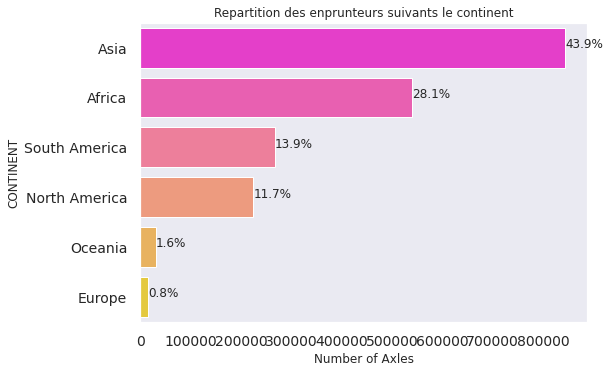

In [82]:
#plt.figure(figsize=(10,30))
ax = sns.countplot(y="CONTINENT", data=loan_copy, order =loan_copy['CONTINENT'].value_counts().index , palette="spring")
#ax = sns.countplot(x=loan_copy['SECTOR_NAME'] )

plt.title('Repartition des enprunteurs suivants le continent')
plt.xlabel('Number of Axles')

total = len(loan_copy['CONTINENT'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

La précédente représentation spaciale nous a permis de constater que le continent africain abritait le plus grand nombre de pays membres de kiva. Ce graphique nous enseigne que le continent concentrant le plus d'emprunteur est le continent asiatique.

* **La photo de l'emprunteur est elle disponible ?**

In [83]:
pd.crosstab(loan_copy['BORROWER_PICTURED'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1)

col_0,freq
BORROWER_PICTURED,
"false, false, false, true, true, true, true, true, false, true, true, false, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000052
"false, false, false, true, true, true, true, true, true, true, false, true, true, true, true, true, true, true, true, true, false, true, true, true, true, true, true, true, true, true, true",0.000052
"false, false, false, true, true, true, true, true, true, true, true, false, true, true, true, true, true, true, true, true",0.000052
"false, false, false, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, false, true, true, true, false, false, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000052
"false, false, false, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000052
...,...
"true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000156
"true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000104
"true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true",0.000468


Nous sommes encore confrontés à la même difficulté que précédemment. Cette variable sera très importante pour notre modèle de prédiction, car elle permettra de savoir si le fait pour un entrepreneur de donner sa photo est gage de bonne conduite de sa part. Ainsi, nous allons nous atteler à la corriger avec les considérations précédemment énoncées, à savoir ne retenir que les premières occurences des modalités et étendre la suppression des missings values à toute la base de données.

In [84]:
# Suppression des missing values
loan_copy = loan_copy.dropna(how='all', subset=['BORROWER_GENDERS'])

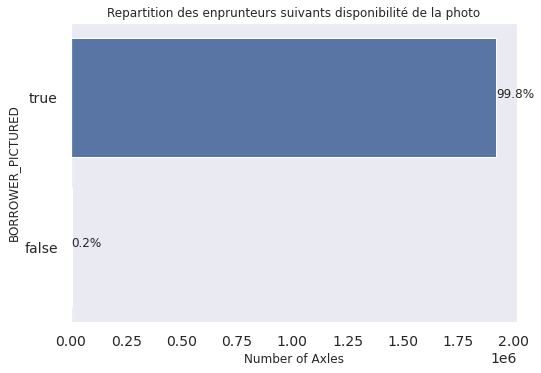

In [85]:
photo = loan_copy['BORROWER_PICTURED'].tolist()
# Boucle qui permet de recupérer la premiere occurence de chaque modalité
photo_correct = []
for i in range(len(photo)):
    photo_correct.append(photo[i].split(',')[0])

loan_copy['BORROWER_PICTURED'] = photo_correct

ax = sns.countplot(y="BORROWER_PICTURED", data=loan_copy)
plt.title('Repartition des enprunteurs suivants disponibilité de la photo')
plt.xlabel('Number of Axles')

total = len(loan_copy['BORROWER_PICTURED'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

Comme illsutré par le graphique, seulement `0,2%` des emprunteurs de kiva n'ont pas envoyé de photo. Ainsi, on peut déjà présumer que cette variable ne permettra pas de bien discriminer les emprunteurs défaillants et les bons entrepreneurs. Toutefois, dans la suite, des analyses appropriées seront menées à cette fin.

* **Intervalle de remboursement**

In [86]:
pd.crosstab(loan_copy['REPAYMENT_INTERVAL'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
REPAYMENT_INTERVAL,
bullet,9.07
irregular,4.34
monthly,86.58


Les prêts de kiva sont le plus fréquemment (`86,58%`) remboursés à intervalles mensuels. La modalité **`bullet`** représente les autres types de remboursement à fréquences régulières qui ne sont pas mensuels, et ces derniers sont effectués par `9,07%` des entrepreneurs.

* **Modèle de distribution du prêt** : 
Rappelons que pour bénéficier d'un prêt en provenance de kiva, soit l'entrepreneur fait recours à une structure partenaire, soit elle demande directement auprès de l'organisation. Ainsi, cette variable permet de capter le moyen d'obtention du prêt.

In [87]:
pd.crosstab(loan_copy['DISTRIBUTION_MODEL'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
DISTRIBUTION_MODEL,
direct,1.03
field_partner,98.97


Comme l'illustre cette sortie, la presque totalité des prêts octroyés par kiva sont faits par leurs strutures partenaires qui sont présentes au niveau local dans l'ensemble des pays membres.

### <span style="color:#FED2CA"> Analyse des variables quantitatives </span>

Pour chacune de ces variables, nous identifierons s'il s'agit d'un montant en unité monétaire ou pas. Cette connaissance nous est fondamentale car grâce à elle, on saura si une conversion de la dite variable en `euro` est nécessaire.

In [88]:
#,'LENDER_TERM'
var_quanti = ['FUNDED_AMOUNT','LOAN_AMOUNT','NUM_LENDERS_TOTAL','NUM_JOURNAL_ENTRIES','NUM_BULK_ENTRIES']
var_date = ['POSTED_DATE', 'DISBURSE_date', 'RAISED_date']

#### Conversion des variables monétaires en euro
Les variables à convertir en euro sont : Funded amount, Loan amount. Pour la conversion, nous allons diviser chacune de ces variables par le taux de change en euro. Ces taux ont été pris au certain, c'est-à-dire : combien d'unités de ces monnaies seront nécessaires pour obtenir un euro.

In [89]:
loan_copy['FUNDED_AMOUNT'] = (pd.to_numeric(loan_copy['FUNDED_AMOUNT'])/pd.to_numeric(loan_copy['taux_euro']))
loan_copy['LOAN_AMOUNT'] = (pd.to_numeric(loan_copy['LOAN_AMOUNT'])/pd.to_numeric(loan_copy['taux_euro']))

#### Analyse

In [90]:
loan_copy[var_quanti].describe() # Description des variables quantitatives de la base de données.

,FUNDED_AMOUNT,LOAN_AMOUNT,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES
count,1.923144e+06,1.923144e+06,1.923144e+06,1.923144e+06,1.923144e+06
mean,1.984348e+02,2.132931e+02,2.137498e+01,1.542321e+00,1.142784e+00
std,9.951899e+02,1.023667e+03,4.175670e+01,1.070149e+00,5.083676e-01
min,0.000000e+00,8.877322e-04,0.000000e+00,1.000000e+00,1.000000e+00
25%,1.163114e+00,1.292349e+00,7.000000e+00,1.000000e+00,1.000000e+00
50%,4.705487e+00,4.976770e+00,1.400000e+01,1.000000e+00,1.000000e+00
75%,8.602209e+01,9.400826e+01,2.600000e+01,2.000000e+00,1.000000e+00
max,4.113757e+05,4.113757e+05,1.526500e+04,1.260000e+02,6.300000e+01


Les principaux enseignements du tableau sont :
  * **FUNDED_AMOUNT** : 
La moyenne des montants empruntés auprès de kiva durant la période d'analyse est de **`199,12€`**. Cette moyenne n'est pas représentative de cette série. En effet, l'écart type est de **`994,57€`**, ce qui donne un coefficient de variation très élevé de l'ordre de **`450%`**. Sur cette période d'analyse, la maximum de montant emprunté est de **`412 991,5€`**. 

* **LOAN_AMOUNT** : 
S'agissant du montant des prêts accordés, la moyenne de cette série durant la période d'analyse est de **`214,87€`**. Comme précédemment observé, cette moyenne n'est pas représentative de cette série. En effet, l'écart type est de **`1 031,15€`** ce qui donne un coefficient de variation très élevé. Sur cette période d'analyse, la maximum de montant emprunté est de **`412 991,5€`**.

* **NUM_LENDERS_TOTAL** :
Le nombre total de prêteurs pour l'octroi d'un prêt à un entrepreneur est en moyenne de **`21`** prêteurs. Toutefois, il importe de noter que certains prêts de kiva ont mobilisé jusqu'à **`1 527`** prêteurs. Ceci semble tout à fait correct étant donné que le montant minimal pour pouvoir prêter via kiva est de **`25 dollars`** et l'observation de la varibale montant de prêt emprunté en dit long sur la struture des prêts.

    Il est important de souligner que cette sortie permet aussi de confirmer les précédements, notamment que ces varibales ne présentent pas de valeurs manquantes.

De l'étape de **`Préprocessing et visualisation uni-variée`**, nous retenons que la variable profil de l'entrepreneur (**target** : *1-Succès ; 0-defaut*) ne permet pas de discriminer notre population d'étude. En effet, les entrepreneurs ayant fait défaut représentent à peine **`4%`** des observations de notre base de données. Ainsi, avant le partitionnement, il faut au préalable construire l’échantillon d’analyse qui soit représentatif. En effet, [TUFFÉRY](http://2543b42e855eac63c3f94c9cc490c07a.moogi.fr) évoque la nécessité de constituer un échantillon contenant 50 % des « positifs » et 50 % des « négatifs », pour éviter de travailler sur un échantillon contenant une faible proportion d’individus d’une classe noyés au milieu des individus de l’autre classe, ceci dans le but d’obtenir des pouvoirs prédictifs exceptionnels.

Ainsi, afin de construire de bons modèles prédictifs évitant d'affecter tous les individus à la classe prépondérante (succès), nous allons rééquilibrer ou **`sous-échantillonner`** notre base de données. Le procédé de rééquilibrage va consister à : 
> Tirer un échantillon des entrepreneurs dans l'ensemble des entrepreneurs pour lequel le prêt est un succès. La taille de cet échantillon à tirer doit être égale au nombre d'entrepreneurs ayant fait défaut.

Il est à noter que les **`Undersampling Algorithms for Imbalanced Classification`** existent et sont très bien indiqués pour ce cas de figure comme l'explique **Jason Brownlee** (professional developer, and machine learning practitioner) à l'adresse https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/. Toutefois, il importe de noter que ces algorithmes sont à utiliser directement pour la modélisation, car ces algorithmes founiront en sortie les performances des modèles mis en oeuvre. Etant donné que nous sommes encore dans la partie analyse exploratoire et que nous aimerions bien comprendre toutes les relations sous-jacentes pouvant exister dans nos données, nous allons adopter notre méthode de sous-échantillonnage. Afin de rester cohérents dans notre démarche, c'est avec cette base sous-échantillonnée que nous allons construire nos algorithmes de prédiction.

Une fois réalisé ce sous-échantillonnage, nous allons bien explorer les différentes relations sous-jacentes existantes entre nos variables. De ce fait, nous allons nous aider des sorties graphiques (bi-variés) pour mieux cerner et comprendre les informations enfouies dans nos données.


### <span style="color:#FED2CA"> Sous-échantillonnage de la base de données </span>

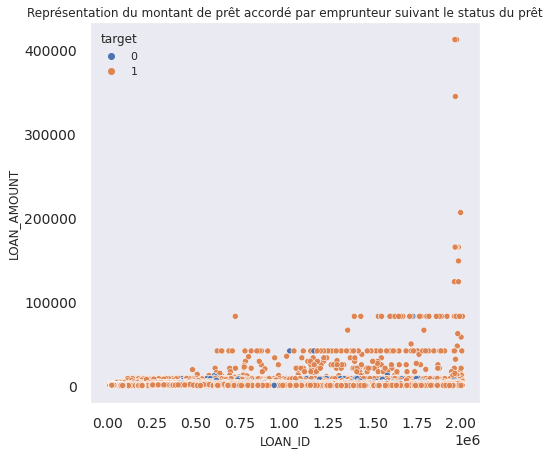

In [91]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=loan_copy.LOAN_ID , y=loan_copy.LOAN_AMOUNT , hue=loan_copy.target)
plt.title('Représentation du montant de prêt accordé par emprunteur suivant le status du prêt')
plt.show()

Ce graphique permet de bien illustrer le fait que la variable statut du prêt ne discrimine pas le montant des prêts accordé.

In [92]:
# Création des bases de défaut et succès
loan_defaud = loan_copy.loc[loan_copy.target==0]
loan_succes = loan_copy.loc[loan_copy.target==1]
print('Base succès : ', loan_defaud.shape,'\nBase defaut : ',loan_succes.shape)

Base succès :  (90782, 29) 
Base defaut :  (1832362, 29)


In [93]:
# tirage d'un échantillon dans la base de succès
loan_succes = loan_succes.sample(n=loan_defaud.shape[0], replace = False)

In [94]:
# On ajoute la base échantillonnée à la suite de la base de défaut d'où l'utilisation du append
loan_final = loan_defaud.append(loan_succes)

In [95]:
loan_final.reset_index(inplace=True)
print('la dimension de la base de donnée finale est ',loan_final.shape)

la dimension de la base de donnée finale est  (181564, 30)


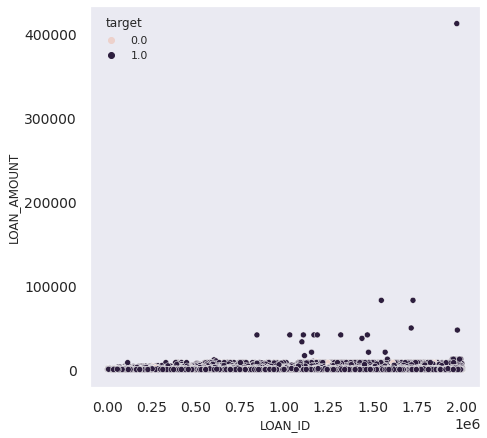

In [96]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=loan_final.LOAN_ID , y=loan_final.LOAN_AMOUNT , hue=loan_copy.target)
plt.show()

La version actuelle du graphique avec la base équilibré permet de voir clairment que la plupart des montant empruntés et qui n'ont pas été remboursé sont des monatant relativement faibles **( < 20 000€)**. 

### <span style="color:#FED2CA"> Analyse bi-variée </span>

* Description des prêts suivant le statut de l'emprunteur : 

Comme précédement énoncé, nous allons poursuivre avec nos étapes de **`NLP`** et suite mettre en avant l'éventuelle corrélation existante entre ces deux variables.


In [97]:
#Taille de la description du prêt suivant le status du prêt
loan_final['length1'] = loan_final['LOAN_USE'].map(len,)

loan_final.groupby('target').length1.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,90782.0,66.556884,34.295801,1.0,41.0,61.0,86.0,371.0
1,90782.0,58.542630,31.132528,1.0,36.0,52.0,74.0,660.0


Cette sortie permet de mettre en avant le fait que la description des emprunts non remboursés ont une description beacoup plus longue en moyenne que celle des emprunts remboursés. Toute fois, il faut noter que l'écart type de distribution de la taille de la description des emprunts non remboursés est beaucoup plus élévée que celle des autres. Ceci dénote une plus grande dispersion de ces derniers.

In [98]:
# Vérification si l'ensemble des reponses sont des chaines de caractères
description = loan_final['LOAN_USE'].tolist()
desc_pb = []
for myst in description:
    if isinstance(myst,str): # Les variables nan sont de type float 
        desc_pb.append(myst)
print(" Le nomnbre de déscription d'emprunt qui sont des string est de :", len(desc_pb),
      "\n Ce nombre d'observation de la base finale qui est de :", loan_final.shape[0])

 Le nomnbre de déscription d'emprunt qui sont des string est de : 181564 
 Ce nombre d'observation de la base finale qui est de : 181564


In [99]:
# Fonction pour rechercher des éventuels erreur dans la détection de la langue de description
texte_decrip = loan_final['LOAN_USE']
langdet = []                                                    

for i in range(len(loan_final)):                                         
    try:                                                          
       lang=detect(texte_decrip[i])                                      
    except:                                                       
       lang='no'                                                  
       print("This row throws error:", texte_decrip[i])                 
    langdet.append(lang)   

This row throws error: .
This row throws error: --
This row throws error:  
This row throws error:  


In [100]:
langdet
output = []
for x in langdet:
    if x not in output:
        output.append(x)
print(' Le code des différentes langues de description du prêt sont : ',output,
     '\n Le nombre de différentes est :',len(output))

 Le code des différentes langues de description du prêt sont :  ['en', 'sv', 'no', 'ro', 'nl', 'es', 'it', 'tl', 'da', 'hr', 'pl', 'fr', 'id', 'vi', 'sk', 'af', 'tr', 'ca', 'pt', 'so', 'fi', 'lt', 'cy', 'de', 'sl', 'hu', 'et', 'ru', 'cs', 'sq', 'bg', 'sw', 'mk'] 
 Le nombre de différentes est : 33


In [101]:
loan_final['langdet'] = pd.DataFrame({'langue':langdet})
pd.crosstab(loan_final['langdet'],'freq').apply(lambda r: 100 * r/len(loan_copy), axis=1).round(2)

col_0,freq
langdet,
af,0.01
bg,0.00
ca,0.00
cs,0.00
cy,0.00
da,0.01
de,0.00
en,9.25
es,0.05


In [102]:
# Définition d'une sous section de la base
database_eng = loan_final[['LOAN_USE','langdet']]
database_eng = database_eng[database_eng['langdet'] == 'en']
database_eng.reset_index(inplace=True)

##### - Tokenization
Cette étape va consister à découper le contenu de chaque mail en "tokens" pour chaque mot. Autrement dit il s'agira scinder chaque phrase en mots.

In [103]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [104]:
tokens = []
for i in range(len(database_eng)):
    tokens.append(nltk.tokenize.word_tokenize(database_eng['LOAN_USE'][i]))

In [105]:
database_eng['tokens'] = tokens

##### - Suppression des "stop-words"

In [106]:
# Suppression des stops words
# Chargement du corpus des stop-words pour l'anglais
stop_words = set(nltk.corpus.stopwords.words('english'))
database_eng['filtered_text'] = database_eng['tokens'].map(lambda tokens: [w for w in tokens if not w in stop_words])

# Affichage des avant et sans stopword
print(database_eng['tokens'][3],end='\n\n')
print(database_eng['filtered_text'][3],end='\n\n')
print("Mots différents :", set(database_eng['tokens'][3]) - set(database_eng['filtered_text'][3]))

['to', 'buy', 'more', 'groceries', 'to', 'sell', 'in', 'her', 'general', 'store', '.']

['buy', 'groceries', 'sell', 'general', 'store', '.']

Mots différents : {'her', 'more', 'in', 'to'}


In [107]:
# Jonction des mails pour reformer la description
database_eng['filtered_text'] = database_eng['filtered_text'].map(lambda text: ' '.join(text))
print(database_eng['filtered_text'][3])

buy groceries sell general store .


##### - Lemmatisation

La lemmatisation désigne un traitement lexical apporté à un texte en vue de son analyse. Ce traitement consiste à appliquer aux occurrences des lexèmes sujets à flexion (en français, verbes, substantifs, adjectifs) un codage renvoyant à leur entrée lexicale commune ("forme canonique" enregistrée dans les dictionnaires de la langue, le plus couramment), que l'on désigne sous le terme de lemme. C'est le procédé par lequel on regroupe des mots de la même famille afin de pouvoir les analyser comme ayant un sens unique. Ainsi, les mots comme 'travailler' & 'travaux' vont être remplacés par le mot 'travail'. <br> 
Ce procédé est indispensable car sinon les mots écrits sous différentes formes (pluriel ou singulier, conjugué ou à l'infinitif) seront considérés comme différent.

In [108]:
wnl = nltk.WordNetLemmatizer()
database_eng['filtered_text'] = database_eng['filtered_text'].map(lambda text: wnl.lemmatize(text))

In [109]:
database_eng['target'] = loan_final['target']

##### Affichage du nuage des mots retrouvés dans la descriptions des prêts à succès 

<Figure size 360x576 with 0 Axes>

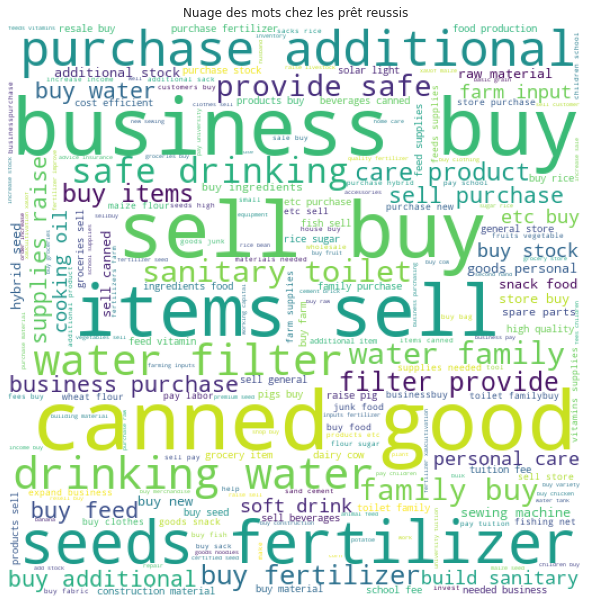

In [110]:
plt.figure(figsize=(5,8))
#ax = fig.add_subplot(3, 2)
spam_words = ''.join(list(database_eng[database_eng['target']==1]['filtered_text']))
spam_cloud = WordCloud(width = 512,height = 512,background_color="white", collocations = True).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor ='w')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.title("Nuage des mots chez les prêt reussis")
plt.show()

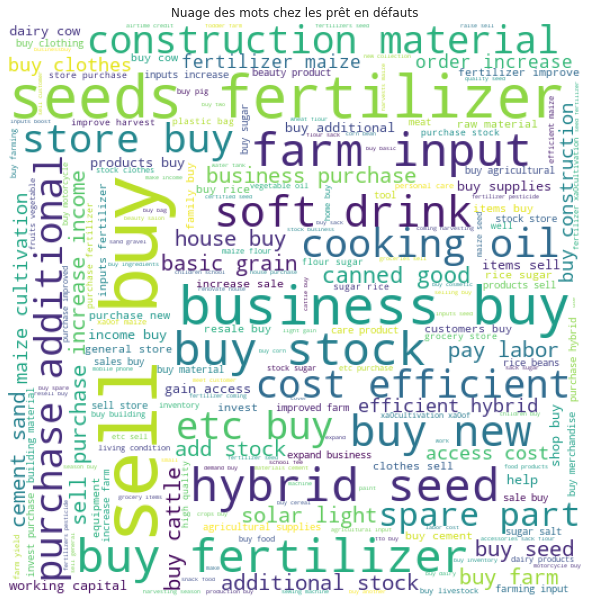

In [111]:
spam_words = ''.join(list(database_eng[database_eng['target']==0]['filtered_text']))
spam_cloud = WordCloud(width = 512,height = 512,background_color="white", collocations = True).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor ='w')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.title("Nuage des mots chez les prêt en défauts")
plt.show()

A l'observation des deux précédents nuages de mots, l'on constate qu'il y'a pas de différence notable dans la description des prêts suivant le status de l'emprunteur. En effet, que l'enprunteur soit en défaut ou pas, le prêt est généralement utilisé à des fins de : `buy`; `sell`; `business`; `fertilizer`. Ainsi, nous n'allons pas inclure ces différents descriptifs dans nos modèles de prédictions du status de l'enprunteur.

* Analyse des remboursement par secteurs d'activité

In [112]:
sector_repayment = ['SECTOR_NAME', 'REPAYMENT_INTERVAL']
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(loan_final[sector_repayment[0]], loan_final[sector_repayment[1]]).style.background_gradient(cmap = cm)

REPAYMENT_INTERVAL,bullet,irregular,monthly
SECTOR_NAME,,,
Agriculture,13712,6093,27736
Bien_Menage,1013,1011,26194
Food,1197,515,34190
Retail,1682,532,35027
autre_secteur,1534,1212,29916


Ce graphique met en eczergue le fait que les remboursements des prêts dans le secteur agricole sont le moins souvent remboursé à fréquence mensuelles. Ce qui n'est pas le cas pour le remboursement des prêts dans le secteur de la alimentaire et de la vente au détail.

* Status du remboursement suivant la fréquence de remboursement

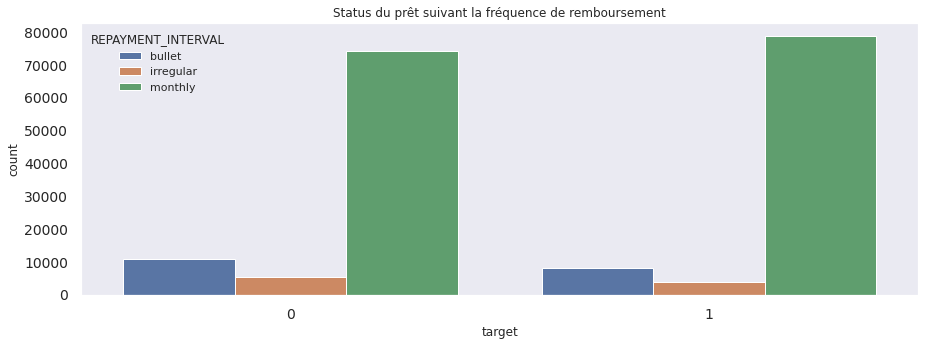

In [113]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x="target", hue='REPAYMENT_INTERVAL', data=loan_final).set_title('Status du prêt suivant la fréquence de remboursement');

Ce graphique permet de constater que la fréquence de remboursement a la même tendance chez les entrepreneure en défaut et chez ceux à succès. En effet, dans ces deux groupes, le remboursement de prêt se fait le plus souvent par mois et le moins souvent à intervalle irrégulier. De cette interprétation, l'on retient que la variable fréquence de remboursement des prêt ne permet pas de faire la distinction à priorie entre un entrepreneur qui  fera defaut et celui qui va rembourser.

* Statut du prêt suivant le sexe de l'emprunteur

In [114]:
pd.crosstab(loan_final['BORROWER_GENDERS'],'freq').apply(lambda r: 100 * r/len(loan_final), axis=1)

col_0,freq
BORROWER_GENDERS,
female,63.043885
male,36.956115


Dans notre nouvelle base de donnée échantillonée, les femmes représentent 63,23% des clients de kiva. Ce chiffre ne d'éloigne pas trop de ce qui était observé sur la base complète.

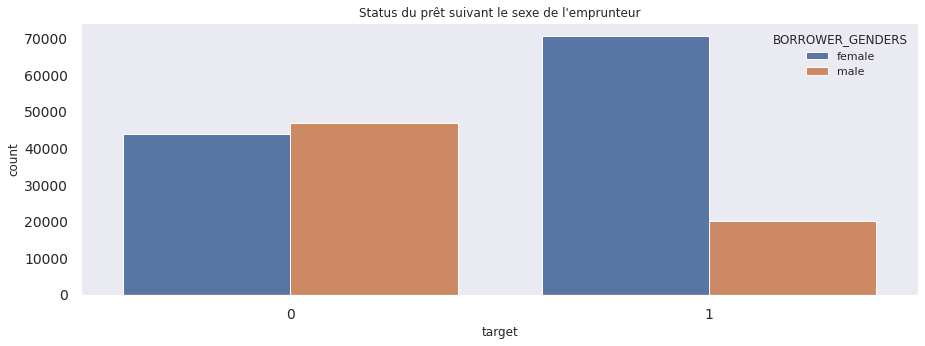

In [115]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x="target", hue='BORROWER_GENDERS', data=loan_final).set_title("Status du prêt suivant le sexe de l'emprunteur");

Le graphique illsutre que les femmes, qui représente prèt de 63% des clients de kiva remboursent le plus souvent leur prêt emprunté relativement aux hommes.

* Correlation entre les différents facteurs

,FUNDED_AMOUNT,LOAN_AMOUNT,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES
FUNDED_AMOUNT,1.000000,0.896255,0.863498,0.054344,0.050154
LOAN_AMOUNT,0.896255,1.000000,0.738117,0.015780,0.022836
NUM_LENDERS_TOTAL,0.863498,0.738117,1.000000,0.076036,0.072412
NUM_JOURNAL_ENTRIES,0.054344,0.015780,0.076036,1.000000,0.888929
NUM_BULK_ENTRIES,0.050154,0.022836,0.072412,0.888929,1.000000


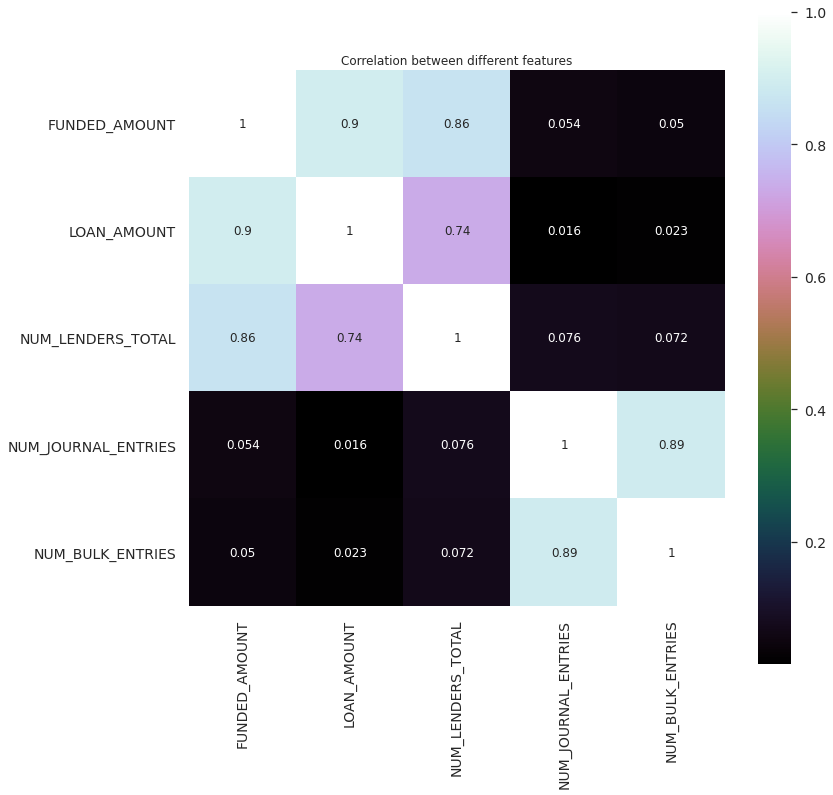

In [116]:
variable = ['FUNDED_AMOUNT','LOAN_AMOUNT','NUM_LENDERS_TOTAL','NUM_JOURNAL_ENTRIES','NUM_BULK_ENTRIES']

corr = loan_final[variable].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap='cubehelix', square=True)
plt.title('Correlation between different features')
corr

Cette sortie graphique permet de constater la faible corrélation entre les différentes variables quantitatives qui entrent enjeux dans le modèle.

# <span style="color:#F4563B"> Modélisation </span>

Pour mener à bien cette étape, rappelons qu'il existe principalement deux types d'apprentissage à savoir **l'apprentissage supervisé** et **l'apprentissage non supervisé**. L'apprentissage non supervisé qui utilise les techniques descriptives est généralement utilisé pour définir les classes. L'apprentissage supervisé quant à lui utilise les techniques prédictives. Dans ces techniques prédictives, suivant la nature
de la variable dépendante (qualitative ou quantitative), on retrouve les techniques d'association et de régression. Compte tenu du fait que nous nous situons dans un cas de prédiction d'une variable binaire, les techniques à mettre en oeuvre sont ceux appartenant à la famille de techniques d'apprentissage supervisé. Dans cette famille, nous allons
appliquer les méthodes suivantes : **`Regression logistique`**; **`le Support Vector Machine`** et le **`Random Forest`**. Une fois définit ces différents algorithmes, nous allons évaluer le plus performant et se servir de ce dernir pour calculer les score de défaut, qui sera l'outil d'aide de décision de kiva quant à l'octroi d'un nouveau prêt ou pas à un nouvel enprunteur.

Avant de passer à la mise en oeuvre des différents alogrithmes, nous allons d'abord nous assurer la qualité des données en entrées. A savoir, nous allons appliquer les méthodes de préprocessing pour les variables à fin que ces derniers soient biens pris en compte dans les modèle.

## Transformation des données

### <span style="color:#FED2CA"> Transformation variables qualitatives </span>
Etant donné que l'étape précédente à permit de recoder les différentes qualitatives ayant beaucoup de modalité, nous allons encoder ces dernières dans cette partie. Pour ce faire, nous allons utiliser l'encodage **`OneHotEncoder`** du module **`preprocessing`** de SKlearn. L'avantage d'avoir fait recours à ce type d'encodage repose sur sa capacité à transformer chaque modalité en matrice binaire composée de 0 et 1. Toutesfois, l'option par défaut `Compressed sparse row` de SKlearn pour ce type d'encodage permet d'éviter d'avoir des matrices trop volumnineuse ce qui n'empiète pas sur les capacités de stockage de l'ordinateur.

In [117]:
# Liste de variables qualitatives à prendre en compte dans le modèle
var_quali = ['BORROWER_GENDERS','SECTOR_NAME','BORROWER_PICTURED','REPAYMENT_INTERVAL','DISTRIBUTION_MODEL','CONTINENT']
X_quali = loan_final[var_quali]

# Encodage
encoder = OneHotEncoder()
X_quali = encoder.fit_transform(X_quali)


### <span style="color:#FED2CA"> Transformation des variables quantitatives </span>
Comme option de transformation, nous optons pour la méthode **`robustScaller`**. En effet, comme observé lors de la phase de analyse quantitative, nous avons observer une grande disparité entre les différents montants de prêts demandés (`LOAN_AMOUNT`), afin de rester fidèle à cette structure de donnée, nous optons pour ce type de transformation. Aussi, cette transformation présente l'avantage d'être insensible aux valeurs abérantes, car elle s'obtient en soustrayant chaque donnée à la médiande de la série, le tout divisé par l'intervalle interquartile.

In [118]:
#Liste des variables à transformer
var_quanti = ['LOAN_AMOUNT','NUM_LENDERS_TOTAL','NUM_JOURNAL_ENTRIES','NUM_BULK_ENTRIES']
X_quanti = loan_final[var_quanti]

#Transformation
scaler = RobustScaler()
X_quanti = scaler.fit_transform(X_quanti)

In [119]:
#Fusion des deux tableaux de données transformées
# Conversion de  X en tableau
X_quali = X_quali.toarray()

#base de donnée qualitative
X_quali = pd.DataFrame(X_quali)
X_quali.rename(columns={0: 'fem', 1: 'hom',2: 'Agri', 3: 'BienMng',4: 'food', 5: 'retail',6: 'autr_sect',7: 'direct',8: 'Part_terrain', 9: 'bullet',10: 'irreg', 11: 'mois', 12: 'phto',13: 'pasPhto', 14: 'Asia',15: 'Afri', 16: 'SouthAmeri', 17: 'NorthAmer',18: 'Oceanie', 19: 'Europe'}, inplace=True)
#base de donnée quantitative
X_quanti = pd.DataFrame(X_quanti)
X_quanti.rename(columns={0: 'LOAN_AMOUNT', 1: 'NUM_LENDERS_TOTAL', 2: 'NUM_JOURNAL_ENTRIES', 3: 'NUM_BULK_ENTRIES'}, inplace=True)


In [120]:
#Fusion
X = pd.concat([X_quanti,X_quali], axis=1, sort=False)
X.head(2)

,LOAN_AMOUNT,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,fem,hom,Agri,BienMng,food,retail,autr_sect,direct,Part_terrain,bullet,irreg,mois,phto,pasPhto,Asia,Afri,SouthAmeri,NorthAmer,Oceanie,Europe
0,0.000097,-0.5000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.015501,-0.5625,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## <span style="color:#F5B7B1"> Feature selection </span>
Après avoir transformé nos variables, recherchons celles qui sont le plus liées possibles à notre variable d'intérêt, donc permettra de bien construire le modèle de prédiction. Pour ce faire, nous optons pour l'algorithme de **`SelectKBest`**. L'avantage de cette algorithme est qu'il va permettre, suivant le critère de test choisir, d'apprécier le lien entre notre variable d'intérêt et les variables du modèles. Comme critère d'appréciation du lien, nous allons le **`test du chi2`**. Ainsi, les variables retenues seront celles qui sont le plus lié possibles à notre target. En outre, il importe de noter que cet algorithme donne aussi la latitude de choisir le nombre de variables indépendantes le plus lié possible à notre target.

In [121]:
y = loan_final['target']

In [122]:
selector = SelectKBest(chi2, k=15)
selector.fit_transform(abs(X),y)

#Affichage des variables enjeux
np.array(X.columns)[selector.get_support()]

array(['LOAN_AMOUNT', 'NUM_LENDERS_TOTAL', 'NUM_JOURNAL_ENTRIES',
       'NUM_BULK_ENTRIES', 'fem', 'hom', 'food', 'retail', 'bullet',
       'irreg', 'phto', 'Afri', 'NorthAmer', 'Oceanie', 'Europe'],
      dtype=object)

A ce niveau, nous avons la liste des 15 variables, bien transformées, qui sont les plus explicatives de la situation de defaut ou pas de l'emprunteur.

Par la suite, nous passons à l'implémentation des différents algorithmes.

### <span style="color:#FED2CA"> Mise en oeuvre des algorithmes </span>

In [123]:
# Division de l'échantillon en test et apprentissage (nous optons pour le 80% apprentissages et 20% tests)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

#### Regression logistique

L'apprentissage par Régression Logistique est une technique d'apprentissage supervisée. Elle a pour objectif de prédire une variable catégorielle Y à partir d'une collection de descripteurs. Comme souligné dans la partie **`méthodologie`**, cette technique présente l'inconvénient d'être très sensible aux valeurs abérrantes. Etant donnée que nous avons utilisé **`OneHotEncoder`**, qui présente l'intérêt d'atténuer l'effet des valuers abérantes, nous aurons donc les performances optimales de notre modèle.

Text(0.5, 352.48, 'Predicted label')

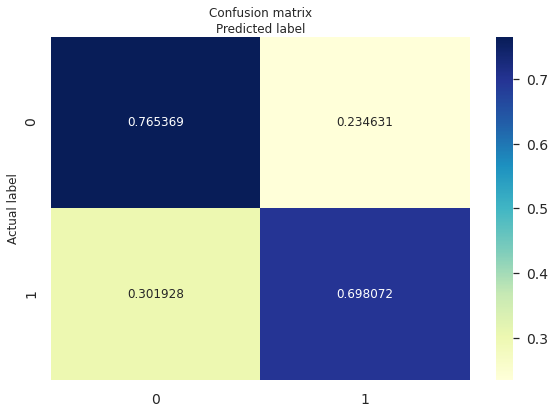

In [124]:
## Confusion matrix 
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix = cnf_matrix.astype('float')/cnf_matrix.sum(axis=1)[:, np.newaxis]

class_names=['defaut','succès'] # Nom des classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Ce graphique illustre la matrice de confusion de notre modèle de regression. Comme on peut le voir, Le **`Taux d'Erreur de Bonne prédiction`** est de 0.26%. C'est à dire qu'en moyenne, sur 10 enprunteurs de kiva, le modèle se trompe sur le status de 3 d'entre eux. Par ailleurs, la probabilité que le modèle prédise qu'un enprunteur en défaut sachant qu'il est est réellement en défaut (**`sensibilité`**) est de 75.98%. Tandis que pour un entrepreneur ayant remboursé son enprunt, la probabilité que le modèle ne se trompe pas sur son status (**`spécificité`**) est de 70.45%.

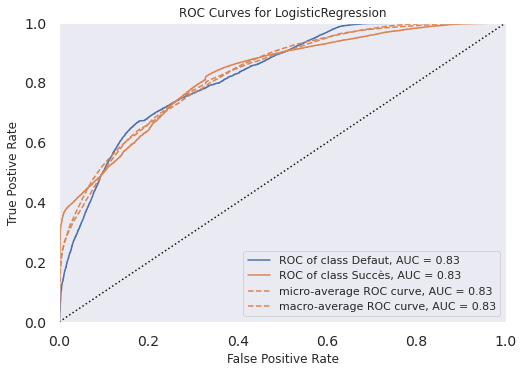

In [125]:
visualizer = ROCAUC(LogisticRegression(), classes=['Defaut','Succès'])

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
g = visualizer.poof()

L'AUC (Area Under Curve) de ROC appelé généralement l'Aire en dessous de la
courbe de ROC, est un indicateur d'évaluation des modèles qui varient entre 0 et 1. En effet, l'AUC est une probabilité qui indique l'évènement que la fonction score place un entrepreneur à succès devant un entrepreneur ayant été en defaut. Pour ce modèle de regression logistique il est de **`0.82`**. 

#### Arbre de regression
Comme annoncé dans la partie méthodologie, c'est la méthodologie de CART qui sera mise en oeuvre dans cet algorithme.

Text(0.5, 352.48, 'Predicted label')

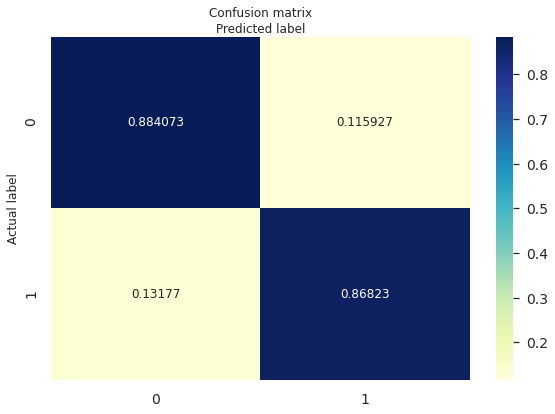

In [126]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix = cnf_matrix.astype('float')/cnf_matrix.sum(axis=1)[:, np.newaxis]

class_names=['defaut','succès'] # Nom des classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

La matrice de confusion de cet algorithme d'arbre de décision permet de constater que le **`Taux d'Erreur de Bonne prédiction`** du modèle est de 12,30%. La sensibilité de ce modèle est de 0.88 tandis que la spécificité est de 0.87%.

### <span style="color:#FED2CA"> Choix du meilleur modèle de prédiction </span>

Nous choisissons de rechercher la meilleure sensibilité possible, dans l'optique de permettre à Kiva de limiter au maximum les défauts et donc n'approuver que les prêts des emprunteurs les plus dignes de confiance, et l’aptitude du modèle à détecter les « bons » emprunteurs est mesurée par la sensibilité. De ce fait le meilleur selon nos données est le **`modèle d'arbre de décision`**. 

### <span style="color:#FED2CA"> Construction de score </span>

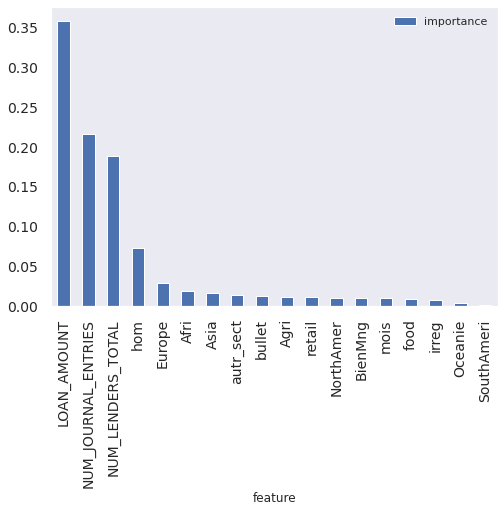

In [127]:
feature_cols = X_test.columns
importance = pd.DataFrame(
    {"feature": feature_cols[:], "importance": clf.feature_importances_[:]}
)
importance.sort_values(
    by="importance",
    axis=0,
    ascending=False,
    inplace=True,
    kind="quicksort",
    na_position="last",
)
importance[:18].plot(x="feature", y="importance", kind="bar")

Ce graphique permet de mettre en eczergue que les caractéristiques fondamentales à prendre en compte kiva pour la décision d'octroie d'un prêt doivent être protée en priorité sur : 
> - `Le montant du prêt`;
- `Le nombre d'écriture journal`;
- `Le nombre total d'emprunteur`;
- `Le sexe de l'entrepreneur`;
-`Le continent d'origine de l'emprunteur`.


In [128]:
def predict_score(LOAN_AMOUNT, NUM_LENDERS_TOTAL, NUM_JOURNAL_ENTRIES, NUM_BULK_ENTRIES, fem, hom,Agri, BienMng,food, retail,autr_sect, 
                  direct,Part_terrain, bullet, irreg, mois, phto,pasPhto, Asia,Afri,SouthAmeri, NorthAmer,Oceanie, Europe):
  predic = clf.predict_proba([[LOAN_AMOUNT, NUM_LENDERS_TOTAL, NUM_JOURNAL_ENTRIES, NUM_BULK_ENTRIES, fem, hom,Agri, BienMng,food, retail,autr_sect, 
                  direct,Part_terrain, bullet, irreg, mois, phto,pasPhto, Asia,Afri,SouthAmeri, NorthAmer,Oceanie, Europe]])
  return predic

*Pour un entrepreneur ayant les caractéristiques suivantes* :
Un entrepreneur de sexe masculin, ressortissant d'un pays Africain, qui souhaite investir un montant de 10 000€ dans le secteur agricole. Ce dernier soummet son projet auprès d'une structure locale, partenaire de Kiva et prévoit un remboursement mensuel. Le nombre total d'écriture journal et de prêteur mobilisé par kiva pour son prêt est respectivement de 5 et 10.

In [129]:
proba = predict_score(10000,10,3,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0)
print('la probabilité que cet enprunteur soit en defaut et celle en succès sont respectivement de : ', proba)

la probabilité que cet enprunteur soit en defaut et celle en succès sont respectivement de :  [[0. 1.]]


Ainsi, connaissant les caractéristiques du prêteurs, kiva pourra entrer ces derniers en paramétres du modèle et définir le seuil à partir duquel le prêt sera accordé ou pas à l'enprunteur.

# <span style="color:#F4563B"> Conclusion et limites </span>

## <span style="color:#F5B7B1"> Conclusion </span>

Ce projet informatique centré sur l'étude du risque de défaut des client de kiva sur la période de 2005 - 2020, nous a permit de mettre en oeuvre l'ensemble des connaissances acquises durant la formation. En effet, elle nous a permis de comprendre les processus de fusion de base de données(merge, append), de transformation d'une base de donnée suivant les besoin des analyses (base long, wide). Par ailleurs, elle nous également permis de mettre en pratique les techniques de webscrapping, NPL et de visualisation.

Les principaux enseignements de ce travail :
> - Plus de la moitié des cliens de kiva sont les femmes ;
- la description du prêt par l'emprunteur ne permet pas de prédire si oui ou non ce dernier fera défaut ou pas ;
- Le montant du prêt et le nombre d'emprunteur à mobilisé pour le prêt sont des facteurs indicatifs si le prêt sera un defaut ou succès.

## <span style="color:#F5B7B1"> Limites </span>
Toute fois, ce travail se trouve limité par la non prises en compte des variables additionnelles (caractéristiques sociales de l'enrpunteur) telles que l'âge, la situation matrimoniale de l'enprunteur.